The scenario is outlined below, and with this, I would like you to undertake the analysis. Please record your findings and outline these within the use of PowerPoint, allowing you to take the interview panel through this on Friday. You will have 15-20 mins to provide this overview.
 
**Scenario**
 
We’ve experienced an issue in Sky Germany, with a series of customer complaints received (direct or indirectly) to Sky. What hasn’t helped is the timing of this issue was the second half of a major champions league football game, that was exclusively on Sky Germany.
 
There is a variety of monitoring tools, and logs, available to teams but due to the scale of the issue there is so much to review and the log files are extensive. One of the sources we have already, provides Streaming Quality data from client devices throughout this period. Shared is an extract of this data around the key period, specifically for all Video Play Failures (VPFs) , for you to continue the analysis at a more granular level present that back, to help support other teams with their own investigations.
 
 
There are some key questions we need answering from the Video Play Failure (VPF) data approved in the spreadsheet:
 
*         What was the impact?
 
*         What time did we start to see a significant increase?
 
*         When did the issue subside, and how long was the duration?
 
*         How can we split the data? Was it isolated to a specific device, operating system or player?
 
 
We need you to present your findings back to the team. If you find any other insights please add them in too for me to review these.


**Plan**
* cleaning data, EDA, colinearity, ...
* random forest
* clustering
* DL, CNN? (also for creditcard (Autoencoder) and income prediction)


**Explain features:**
* interrupts is the number of errors occured
* startup time (milisecond) is the time between initiating the request and content playback
* 1second=1000 miliseconds. MS is milisecond
* Playing time (ms). Playing total duration

In [196]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [197]:
df=pd.read_excel('Observability-TechTest.xlsx')

In [198]:
df.head()

,day,proposition,viewerID,asset,deviceOS,country,state,city,asn,isp,...,session_out_of_home,session_channel_id,session_content_type,session_episode,session_goal_id,session_viewer_id,session_pt_os,session_pt_os_ver,session_device_marketing_name,session_player_name
0,2020-08-19,SkyDE,192283420a01f97a2c1f4c936aa4d1b2a9c5439b,Live-129-Sky Sport 1 HD,iOS,austria,niederoesterreich,maria enzersdorf,8339,"ASN: KABSI-AS, AT",...,1.0,NaN,unknown,NaN,NaN,NaN,iOS,iOS 13.6,Apple iPhone 8,skygo-de-ios
1,2020-08-19,SkyDE,1396c74a853f8651bf418c55296b3c715deeb0a1,Live-129-Sky Sport 1 HD,OS X,germany,hamburg,hamburg,3209,Vodafone,...,1.0,NaN,NaN,NaN,NaN,NaN,macOS,OS X 10.15.6,"Apple MacBookAir7,2",skygo-de-desktop
2,2020-08-19,SkyDE,015f3b9bb5dca429f106796d61b2aa0dd86e8dcd,Live-129-Sky Sport 1 HD,Tizen,germany,hamburg,hamburg,31334,Kable Deutschland,...,NaN,NaN,Movies,NaN,NaN,NaN,Tizen,Tizen Platform: 5.0 | API: 3.0 | Web API: 3.0,Samsung Tizen TV,skyq-de-samsungtv
3,2020-08-19,SkyDE,d10afbbb7a2ba45c0c9de4765d4aa1f10fbfd4e7,Live-82286d1e-1858-11e9-bf44-db93f4694cd7-Sky ...,tvOS,germany,baden-wuerttemberg,karlsruhe,8881,Versatel,...,NaN,NaN,NaN,NaN,NaN,NaN,tvOS,tvOS 13.4.8,Apple Unknown,skyticket-de-appletv
4,2020-08-19,SkyDE,94714557f7f8da09b815b96b1c0574d8963485a8,Live-129-Sky Sport 1 HD,iOS,germany,bremen,bremen,3320,Deutsche Telekom,...,1.0,NaN,unknown,NaN,NaN,NaN,iOS,iOS 12.4.8,Apple iPad Air,skygo-de-ios


In [199]:
df['asset'].value_counts()

Live-129-Sky Sport 1 HD                                                                          32491
Live-129-Live UEFA CL: ManCity/Lyon - Barca/Bayern, Halbfinale                                    1691
Live-114-Sky Sport 2 HD                                                                            845
Live-129-Live UEFA CL: Olympique Lyon - FC Bayern M√ºnchen, Halbfinale                             606
Live-82286d1e-1858-11e9-bf44-db93f4694cd7-Sky Sport 1 HD                                           479
                                                                                                 ...  
TF15919744-American Housewife|S2|E9|Neue beste Freunde                                               1
TF2080755-Band Of Brothers - Wir waren wie Br√ºder|S1|E2|Der erste Tag                               1
AAEOID011557-911332002-Keeping Up with the Kardashians|S9|E11|Keeping Up with the Kardashians        1
TF1283766-Good Fellas - Drei Jahrzehnte in der Mafia                     

In [200]:
df['session_channel_name'].value_counts()

Sky Sport 1 HD                                                   32971
Live UEFA CL: ManCity/Lyon - Barca/Bayern, Halbfinale             1691
Sky Sport 2 HD                                                     851
VOD                                                                612
Live UEFA CL: Olympique Lyon - FC Bayern M√ºnchen, Halbfinale      607
                                                                 ...  
VOX                                                                  1
ORF2W HD                                                             1
SAT.1                                                                1
ORF1 HD                                                              1
Junior                                                               1
Name: session_channel_name, Length: 119, dtype: int64

In [201]:
df['session_channel_id'].value_counts()

Series([], Name: session_channel_id, dtype: int64)

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38733 entries, 0 to 38732
Data columns (total 41 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   day                            38733 non-null  datetime64[ns]
 1   proposition                    38733 non-null  object        
 2   viewerID                       38730 non-null  object        
 3   asset                          38732 non-null  object        
 4   deviceOS                       38729 non-null  object        
 5   country                        38733 non-null  object        
 6   state                          38733 non-null  object        
 7   city                           38733 non-null  object        
 8   asn                            38733 non-null  int64         
 9   isp                            38733 non-null  object        
 10  startTime                      38733 non-null  object        
 11  startupTimeMS  

In [203]:
df['session_device_brand'].isna().sum()

38733

In [204]:
df['day'].unique()

array(['2020-08-19T00:00:00.000000000'], dtype='datetime64[ns]')

In [205]:
# delete the nan columns: 
df_=df.drop(['session_device_brand', 'session_device_model', 'session_channel_id','session_goal_id', 'session_viewer_id', 'session_episode','session_out_of_home'], axis=1)

In [206]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38733 entries, 0 to 38732
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   day                            38733 non-null  datetime64[ns]
 1   proposition                    38733 non-null  object        
 2   viewerID                       38730 non-null  object        
 3   asset                          38732 non-null  object        
 4   deviceOS                       38729 non-null  object        
 5   country                        38733 non-null  object        
 6   state                          38733 non-null  object        
 7   city                           38733 non-null  object        
 8   asn                            38733 non-null  int64         
 9   isp                            38733 non-null  object        
 10  startTime                      38733 non-null  object        
 11  startupTimeMS  

In [207]:
df['session_content_type'].value_counts()

Movies                  9300
Sports                  7770
unknown                 3074
SPORTS                   380
SPORT                    349
Entertainment            165
Filme                     86
Sport                     70
News                      19
ENTERTAINMENT             14
Film                       9
Unterhaltung & Serie       9
Doku                       6
Unterhaltung               5
Kids                       4
Marktplatz                 1
Regionales                 1
News & International       1
CINEMA                     1
Serien                     1
News & Intl.               1
Name: session_content_type, dtype: int64

In [208]:
df_.columns

Index(['day', 'proposition', 'viewerID', 'asset', 'deviceOS', 'country',
       'state', 'city', 'asn', 'isp', 'startTime', 'startupTimeMS',
       'playingTimeMS', 'interrupts', 'startupError', 'cdn', 'browser', 'vpf',
       'vpfErrorList', 'networkType', 'endTime', 'session_device_manufacturer',
       'session_device_conn', 'session_appversion', 'session_browser_version',
       'session_hardware_type', 'session_source', 'session_is_live',
       'session_channel_name', 'session_content_type', 'session_pt_os',
       'session_pt_os_ver', 'session_device_marketing_name',
       'session_player_name'],
      dtype='object')

In [209]:
df_['proposition'].unique()

array(['SkyDE'], dtype=object)

In [210]:
#drop column'proposition'
df_=df_.drop('proposition', axis=1)

In [211]:
df_['asset'].unique()

array(['Live-129-Sky Sport 1 HD',
       'Live-82286d1e-1858-11e9-bf44-db93f4694cd7-Sky Sport 1 HD',
       'Live-129-Live UEFA CL: ManCity/Lyon - Barca/Bayern, Halbfinale',
       'Live-221-Sky Sport 1',
       'TF7921951-Game of Thrones - Das Lied von Eis und Feuer|S6|E4|Game of Thrones - Das Lied von Eis und Feuer',
       'Live-114-Sky Sport 2 HD',
       '04C57789719A406A850CA210A83C3182-Harley Quinn: Birds of Prey',
       'Live-518-Romance TV', 'Live-407-Sky Cinema Family',
       'c0fb4d3b-245c-4524-b43d-15316157cbd0-Outlander|Sundefined|E1|Outlander',
       'TF9558164-The Young Pope|S1|E6|Episode 6',
       'TF2006725-Der letzte Befehl',
       'TF10942756-Grizzy und die Lemminge|S1|E16|Der Spielautomat',
       'TF10890393-Botched|S3|E13|Honey Buhu', 'Live-133-Beate Uhse HD',
       'CB12050208-Manchester City - Olympique Lyon - die Highlights im Video',
       'TF16175064-Swingerclubreport|S10|E1|Oase',
       'TF15121015-Departure - Wo ist Flug 716?|S1|E2|Die √úberlebende'

In [212]:
len(df_['asset'].unique())

631

In [213]:
df_['deviceOS'].unique()

array(['iOS', 'OS X', 'Tizen', 'tvOS', 'Windows 10', 'webOS', 'Windows 7',
       'Android', 'Chrome OS', 'Linux', 'PlayStation 4 OS', 'Windows 8.1',
       'Xbox OS', 'Roku OS', 'Windows 8', nan, 'Apple TVOS', 'Fire OS'],
      dtype=object)

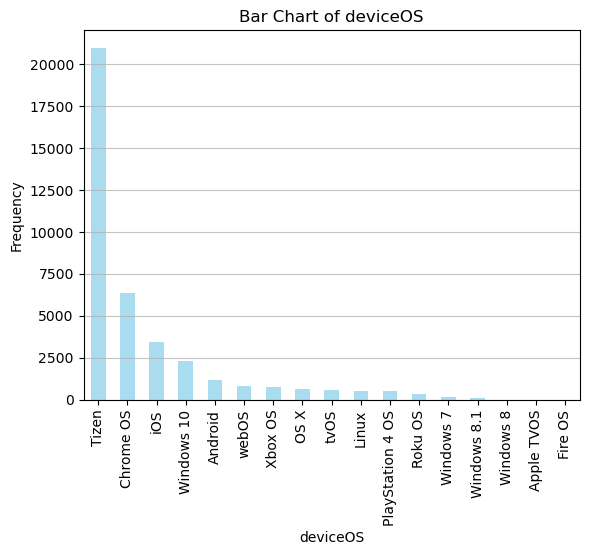

In [214]:
# Count the occurrences of each category
deviceOS_counts = df['deviceOS'].value_counts()

# Plotting the bar chart (histogram is for numeric data)
deviceOS_counts.plot(kind='bar', color='skyblue', alpha=0.7)
plt.title('Bar Chart of deviceOS')
plt.xlabel('deviceOS')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

In [215]:
df_['country'].unique()

array(['austria', 'germany', 'croatia', 'netherlands', 'denmark',
       'iceland', 'france', 'czech republic', 'italy', 'spain', 'belgium',
       'luxembourg', 'greece', 'portugal', 'hungary', 'united kingdom',
       'poland', 'lithuania', 'norway', 'united states', 'finland',
       'slovenia', 'slovak republic', 'sweden', 'ireland', 'estonia',
       'bulgaria', 'cyprus', 'switzerland'], dtype=object)

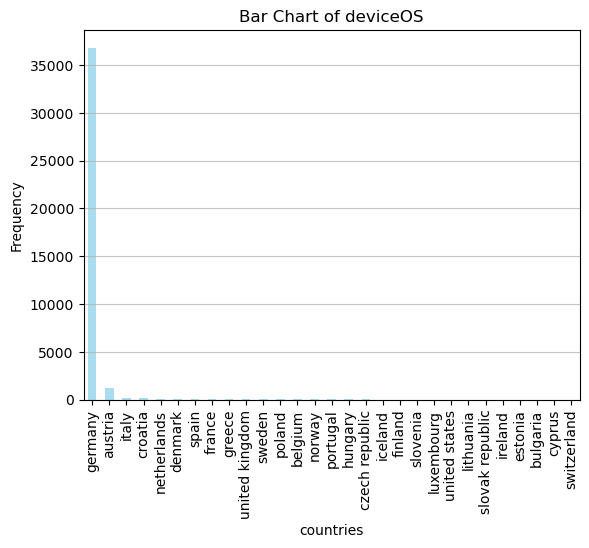

In [216]:
# Count the occurrences of each category
country_counts = df['country'].value_counts()

# Plotting the bar chart (histogram is for numeric data)
country_counts.plot(kind='bar', color='skyblue', alpha=0.7)
plt.title('Bar Chart of deviceOS')
plt.xlabel('countries')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

In [217]:
country_counts

germany            36813
austria             1175
italy                186
croatia              121
netherlands           75
denmark               71
spain                 53
france                50
greece                31
united kingdom        21
sweden                19
poland                18
belgium               16
norway                14
portugal              14
hungary               11
czech republic        11
iceland                7
finland                5
slovenia               5
luxembourg             4
united states          3
lithuania              2
slovak republic        2
ireland                2
estonia                1
bulgaria               1
cyprus                 1
switzerland            1
Name: country, dtype: int64

In [218]:
36813/38733

0.9504298660057315

In [219]:
#can be dropped
country_counts

germany            36813
austria             1175
italy                186
croatia              121
netherlands           75
denmark               71
spain                 53
france                50
greece                31
united kingdom        21
sweden                19
poland                18
belgium               16
norway                14
portugal              14
hungary               11
czech republic        11
iceland                7
finland                5
slovenia               5
luxembourg             4
united states          3
lithuania              2
slovak republic        2
ireland                2
estonia                1
bulgaria               1
cyprus                 1
switzerland            1
Name: country, dtype: int64

In [220]:
#post code, can be dropped
len(df['asn'].unique())

409

Index(['day', 'proposition', 'viewerID', 'asset', 'deviceOS', 'country',
       'state', 'city', 'asn', 'isp', 'startTime', 'startupTimeMS',
       'playingTimeMS', 'interrupts', 'startupError', 'cdn', 'browser', 'vpf',
       'vpfErrorList', 'networkType', 'endTime', 'session_device_manufacturer',
       'session_device_conn', 'session_appversion', 'session_browser_version',
       'session_hardware_type', 'session_source', 'session_is_live',
       'session_channel_name', 'session_content_type', 'session_pt_os',
       'session_pt_os_ver', 'session_device_marketing_name',
       'session_player_name'],
      dtype='object')

In [221]:
#post code, can be dropped
len(df['state'].unique())

181

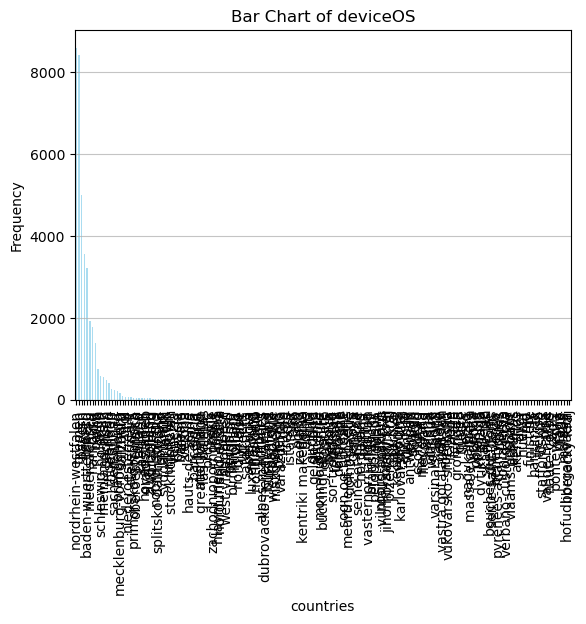

In [222]:
# Count the occurrences of each category
state_counts = df['state'].value_counts()

# Plotting the bar chart (histogram is for numeric data)
state_counts.plot(kind='bar', color='skyblue', alpha=0.7)
plt.title('Bar Chart of deviceOS')
plt.xlabel('countries')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

In [223]:
state_counts

nordrhein-westfalen    8604
bremen                 8427
bayern                 4999
hessen                 3560
baden-wuerttemberg     3213
                       ... 
braga                     1
liege                     1
malaga                    1
hofudborgarsvaedi         1
liberecky kraj            1
Name: state, Length: 181, dtype: int64

In [224]:
df_['isp'].value_counts()

Deutsche Telekom                           16889
UPC Broadband                               6370
Vodafone                                    4561
Versatel                                    2066
telefonica deutschland                      1538
                                           ...  
ASN: REGIONETZ, DE                             1
ASN: ASDETUK http://www.heficed.com, GB        1
ASN: AS12440 HNS-, DE                          1
ASN: O2-CZECH-REPUBLIC, CZ                     1
ASN: LINKEM-AS, IT                             1
Name: isp, Length: 397, dtype: int64

In [225]:
len(df_['isp'].unique())

397

### Preprocessing time data
* time: second half of a match? Which match? related info about that
* time, devices, streamers, states, ...
* target feature?

In [226]:
len(df_['startTime'].unique())

1199

In [227]:
df_['startTime'].unique()

array(['2020-08-19 20:20:00 UTC', '2020-08-19 20:20:01 UTC',
       '2020-08-19 20:20:02 UTC', ..., '2020-08-19 20:39:58 UTC',
       '2020-08-19 20:39:59 UTC', '2020-08-19 20:40:00 UTC'], dtype=object)

In [228]:
# only get the date
# Convert the string column to datetime
df_['startTime'] = pd.to_datetime(df_['startTime'])

# Extract the date
df_['startTime_dt'] = df_['startTime'].dt.date
# Extract the hour and minute
df_['startTime_hr_mt'] = df_['startTime'].dt.strftime('%H:%M')

In [229]:
df_['startTime_dt'].unique()

array([datetime.date(2020, 8, 19)], dtype=object)

In [230]:
df_['startTime_hr_mt'].unique()

array(['20:20', '20:21', '20:22', '20:23', '20:24', '20:25', '20:26',
       '20:27', '20:28', '20:29', '20:30', '20:31', '20:32', '20:33',
       '20:34', '20:35', '20:36', '20:37', '20:38', '20:39', '20:40'],
      dtype=object)

#### others

In [231]:
df_['startupTimeMS'].unique()

array([ 2258,  6406,  1767, ...,  7232,  7699, 31339], dtype=int64)

In [232]:
len(df_['startupTimeMS'].unique())

9907

 'startupTimeMS', 'playingTimeMS', 'interrupts', 'startupError', 'cdn', 'browser', 'vpf', 'vpfErrorList', 'networkType', 'endTime', 'session_device_manufacturer', 'session_device_conn', 'session_appversion', 'session_browser_version', 'session_hardware_type', 'session_source', 'session_is_live', 'session_channel_name', 'session_content_type', 'session_pt_os', 'session_pt_os_ver', 'session_device_marketing_name', 'session_player_name'

In [233]:
df_['playingTimeMS'].unique()

array([3843094,  583780,  618627, ..., 1894193,   40420,   40376],
      dtype=int64)

In [234]:
len(df_['playingTimeMS'].unique())

30550

In [235]:
df_['interrupts'].unique()

array([  0,   1,  10,   5,   2,   7,  21,   3,   4,  52,   6,  17,  11,
        12,  33,  39,   8,  47,  26,   9,  27,  50,  19,  13,  15,  14,
        18,  46,  40,  60,  32,  30,  23,  20,  16,  24,  25,  51,  28,
        38,  34,  29,  31,  22, 137, 102,  42], dtype=int64)

In [236]:
df_['startupError'].unique()

array([0], dtype=int64)

In [237]:
df_['startupError'].value_counts()

0    38733
Name: startupError, dtype: int64

In [238]:
# drop column 'startupError'
df_=df_.drop('startupError', axis=1)

In [239]:
df_['cdn'].unique()
#array(['AKAMAI', 'LIMELIGHT', 'UNKNOWN'], dtype=object)
# Akamai Connected Cloud is a massively distributed edge and cloud platform that keeps experiences closer to users
#Limelight Realtime Streaming delivers live video from anywhere in the world, to anywhere in the world, with less than one second of latency.

array(['AKAMAI', 'LIMELIGHT', 'UNKNOWN'], dtype=object)

In [240]:
df_['cdn'].value_counts()

AKAMAI       20492
LIMELIGHT    18189
UNKNOWN         52
Name: cdn, dtype: int64

In [241]:
df_['browser'].value_counts()

Native App    38731
apple_tv          2
Name: browser, dtype: int64

In [242]:
#drop column 'browser'
df_=df_.drop('browser',axis=1)

In [243]:
df_['vpf'].value_counts()

1    38733
Name: vpf, dtype: int64

In [244]:
len(df_['vpfErrorList'].unique())

366

In [245]:
# Errors are not really clear, not detailed--> drop?
df_['vpfErrorList'].unique()

array(['PIN:3&SKYError.PIN.3', 'VGC-4253024360:503 - XFERM_DOWNLOAD_ERR',
       'PLAYER_ERROR_INVALID_OPERATION - null',
       '11819 -@ Vorgang kann nicht abgeschlossen werden',
       'com.bskyb.SKDRMCiscoErrorDomain:4227858454&com.bskyb.SKDRMCiscoErrorDomain:4253024387&SKYError.com.bskyb.SKDRMCiscoErrorDomain.4253024387.4227858454.ottLivePlayback&PlaybackError:2&DRMPlaybackService:2&PlayerItemLoaderAddOn:7',
       '2 - 2: Unidentified error',
       '1010:403&SPSServerError:403&SPS:8&SKYError.GenericErrorMessage.xxxx',
       '-11800 AVFoundationErrorDomain&The operation couldn‚Äôt be completed. (skyPlayer error 1.)',
       'The response timed out&PLAYBACK_INACTIVITY_ERROR_OTT : 38',
       '30 - Sorry, a technical error occurred while playing this channel.',
       '0 - Playback ended because of error',
       'com.bskyb.SKDRMCiscoErrorDomain:4227858454&com.bskyb.SKDRMCiscoErrorDomain:4253024387&SKYError.com.bskyb.SKDRMCiscoErrorDomain.4253024387.4227858454.ottLivePlayback&Play

In [246]:
df_['networkType'].value_counts()

external    38733
Name: networkType, dtype: int64

In [247]:
#drop 'vpf' and 'networkType' and 'viewerID'
df_=df_.drop(['vpf', 'networkType', 'viewerID'], axis=1)

In [248]:
#drop 'day', 'startTime_dt'
df_=df_.drop(['day', 'startTime_dt'], axis=1)

'endTime', 'session_device_manufacturer', 'session_device_conn', 'session_appversion', 'session_browser_version', 'session_hardware_type', 'session_source', 'session_is_live', 'session_channel_name', 'session_content_type', 'session_pt_os', 'session_pt_os_ver', 'session_device_marketing_name', 'session_player_name'

#### time variables

In [249]:
df_['endTime'].unique()

array(['2020-08-19 21:24:03.094 UTC', '2020-08-19 20:29:43.78 UTC',
       '2020-08-19 20:30:31.329 UTC', ..., '2020-08-19 20:40:50.188 UTC',
       '2020-08-19 21:12:01.562 UTC', '2020-08-19 20:40:50.19 UTC'],
      dtype=object)

In [250]:
len(df_['endTime'].unique())

33537

In [251]:
# only get the date
# Convert the string column to datetime
df_['endTime'] = pd.to_datetime(df_['endTime'])

# Extract the date
df_['endTime_dt'] = df_['endTime'].dt.date
# Extract the hour and minute
df_['endTime_hr_mt'] = df_['endTime'].dt.strftime('%H:%M')

In [252]:
df_['endTime_dt'].value_counts()

2020-08-19    38733
Name: endTime_dt, dtype: int64

In [253]:
df_['endTime_hr_mt'].value_counts()

20:30    16229
20:29     7683
20:36     4849
20:31     1382
20:35      637
         ...  
21:46        4
21:59        4
21:58        4
22:00        4
21:44        3
Name: endTime_hr_mt, Length: 101, dtype: int64

In [254]:
len(df_['endTime_hr_mt'].value_counts())

101

#### others

In [255]:
df_['session_device_manufacturer'].value_counts()

Samsung                             21722
Google                               6363
Apple                                4438
LG                                    848
Microsoft                             837
                                    ...  
hena                                    1
MICRO-STAR INTERNATIONAL CO.,LTD        1
eMachines                               1
Nokia                                   1
Trekstor                                1
Name: session_device_manufacturer, Length: 82, dtype: int64

In [256]:
#device connection: can be dropped because so much unknown
#df_['session_device_conn'].value_counts()

In [257]:
#df_=df_.drop('session_device_conn', axis=1)

In [258]:
 df_['session_appversion'].value_counts()

5.7.1                12403
4.3.1                 6353
1.46.11               5588
1.46.9                4499
17.1.0                2002
10.2.0                1939
6.4.0                 1038
20.5.1                 829
20.5.1.2               670
5.6.4                  503
Q120.002.13.00L        499
0.0.1                  493
10.13.0                411
ROKU V5.9.19           347
20.5.2-1               232
10.13.1                196
10.14.0                152
1.1.6.1571935218       116
14.1.0                  93
12.4.13                 79
1.42.6                  71
13.6.2                  35
15.1.3                  32
20.4.1                  20
10.11.0                 17
1.26.5                  15
1.38.3                  11
10.12.0                 10
1.29.11                  8
Q110.000.73.00L          7
13.1.1                   6
10.10.0                  6
ROKU V5.7.135            6
10.9.2                   5
20.6.0                   5
1.42.5                   4
12.4.9                   4
1

In [259]:
 df_['session_browser_version'].value_counts()

Native App    38731
Name: session_browser_version, dtype: int64

In [260]:
#drop 'session_browser_version'
df_=df_.drop('session_browser_version', axis=1)

In [261]:
df_[ 'session_hardware_type'].value_counts()

TV                       24543
Set Top Box               4647
Desktop                   3232
Tablet                    2767
Mobile Phone              1788
Games Console             1255
Single-board Computer        7
Name: session_hardware_type, dtype: int64

In [262]:
df_['session_source'].value_counts()

OTT    37027
STB       28
Name: session_source, dtype: int64

In [263]:
df_=df_.drop('session_source', axis=1)

#### Next:
'session_is_live', 'session_channel_name', 'session_content_type', 'session_pt_os', 'session_pt_os_ver', 'session_device_marketing_name', 'session_player_name'

In [264]:
#is session live?
df_['session_is_live'].value_counts()

T    38070
F      657
Name: session_is_live, dtype: int64

In [265]:
df_[df_['session_is_live']=='F']['startTime_hr_mt'].value_counts()

20:24    66
20:21    53
20:20    48
20:22    46
20:27    42
20:25    38
20:23    35
20:29    33
20:32    29
20:35    28
20:28    28
20:30    27
20:26    27
20:39    27
20:37    26
20:33    23
20:34    21
20:31    20
20:36    20
20:38    20
Name: startTime_hr_mt, dtype: int64

In [266]:
df_['startTime_hr_mt'].value_counts()

20:30    10977
20:29     9702
20:31     5441
20:24     1657
20:27     1273
20:28     1147
20:25     1123
20:32     1050
20:26      896
20:23      846
20:20      808
20:22      759
20:21      748
20:33      410
20:35      403
20:37      346
20:36      316
20:34      286
20:38      266
20:39      259
20:40       20
Name: startTime_hr_mt, dtype: int64

In [267]:
df_[df_['session_is_live']=='F']['state'].value_counts()

nordrhein-westfalen       155
hessen                    112
bayern                     67
baden-wuerttemberg         60
wien                       44
niedersachsen              43
bremen                     34
rheinland-pfalz            23
berlin                     21
hamburg                    17
schleswig-holstein         15
saarland                   13
sachsen                    12
mecklenburg-vorpommern      6
brandenburg                 6
kaernten                    5
sachsen-anhalt              5
tirol                       5
thueringen                  4
steiermark                  3
salzburg                    2
niederoesterreich           2
primorsko-goranska          1
oberoesterreich             1
limburg                     1
Name: state, dtype: int64

In [268]:
df_[df_['session_is_live']=='F']['vpfErrorList'].value_counts()

ERROR_20 - VPF-start - Video Playback Failure - stream timeout                                                      356
OVP_ERROR_HEARTBEAT_1 - 1010 - streamingTicket not found                                                             51
SOM                                                                                                                  36
905 - {"type":"LOAD_CANCELLED","reason":"INVALID_REQUEST","requestId":0}&0 - Playback ended because of error         25
NOT BROADCASTING                                                                                                     23
                                                                                                                   ... 
ERROR_17 - VPF-buffering - Video Playback Failure - buffering timeout                                                 1
CoreMediaErrorDomain:-16847&NSURLErrorDomain:-1008&PlaybackError:3&SKYError.GenericErrorMessage.xxxx                  1
OVP_ERROR_HEARTBEAT_1 - 4008 - Streaming

In [269]:
df_['session_channel_name'].value_counts()

Sky Sport 1 HD                                                   32971
Live UEFA CL: ManCity/Lyon - Barca/Bayern, Halbfinale             1691
Sky Sport 2 HD                                                     851
VOD                                                                612
Live UEFA CL: Olympique Lyon - FC Bayern M√ºnchen, Halbfinale      607
                                                                 ...  
VOX                                                                  1
ORF2W HD                                                             1
SAT.1                                                                1
ORF1 HD                                                              1
Junior                                                               1
Name: session_channel_name, Length: 119, dtype: int64

In [270]:
df_['session_channel_name'].unique()

array(['Sky Sport 1 HD',
       'Live UEFA CL: ManCity/Lyon - Barca/Bayern, Halbfinale',
       'Sky Sport 1', 'VOD', 'Sky Sport 2 HD', 'Romance TV',
       'Sky Cinema Family', 'Beate Uhse HD', 'SYFY HD', 'Sky One HD',
       'Sky Cinema Best Of HD', 'zdf_neo HD', 'Sky Sport News HD',
       'Live UEFA CL: Olympique Lyon - FC Bayern M√ºnchen, Halbfinale',
       'Sky Krimi HD', 'TNT Film HD', 'Sky Sport Austria 1 HD',
       'Sky Cinema Best Of', 'Sky Sport Bundesliga 1 HD',
       'Sky Sport Austria 1', 'Spiegel Geschichte HD',
       'Sky Cinema Action', 'ZDFinfo HD', 'Sky Cinema Classics',
       'Das Erste HD', '13th Street HD', 'Sky Box Sets', 'Sky Cinema Fun',
       'Sky Cinema Action HD', 'Fox HD', 'TNT Serie HD',
       'Crime + Investigation', 'Sky Cinema Special HD',
       'E! Entertainm. HD', 'WDR HD K√∂ln', 'Discovery HD', 'SWR RP HD',
       'PHOENIX HD', 'Universal TV HD', 'Heimatkanal',
       'Mit dem Supersport Monatsticket', 'Sky Sport News', 'NatGeo HD',
       'B

In [271]:
len(df_['session_channel_name'].unique())

120

In [272]:
df_['session_content_type'].value_counts()

Movies                  9300
Sports                  7770
unknown                 3074
SPORTS                   380
SPORT                    349
Entertainment            165
Filme                     86
Sport                     70
News                      19
ENTERTAINMENT             14
Film                       9
Unterhaltung & Serie       9
Doku                       6
Unterhaltung               5
Kids                       4
Marktplatz                 1
Regionales                 1
News & International       1
CINEMA                     1
Serien                     1
News & Intl.               1
Name: session_content_type, dtype: int64

In [273]:
df_[ 'session_pt_os'].value_counts()

Tizen             20962
Chrome OS          6353
iOS                3464
Windows            2563
Android            1172
webOS               842
Xbox OS             750
macOS               645
tvOS                607
Linux               508
PlayStation OS      505
Roku OS             354
Fire OS               2
Name: session_pt_os, dtype: int64

In [274]:
len(df_[ 'session_pt_os'].value_counts())

13

In [275]:
 df_['session_pt_os_ver'].value_counts()

Tizen Platform: 5.0 | API: 3.0 | Web API: 3.0    6865
Tizen Platform: 4.0 | API: 3.0 | Web API: 3.0    4856
Tizen Platform: 3.0 | API: 3.0 | Web API: 3.0    4684
Chrome OS 1.42.172094                            3006
Chrome OS 1.47.216070                            2440
                                                 ... 
webOS 04.10.04                                      1
iOS 9.0                                             1
iOS 9.3.3                                           1
webOS 04.30.65                                      1
webOS 03.00.08                                      1
Name: session_pt_os_ver, Length: 254, dtype: int64

In [276]:
len( df_['session_pt_os_ver'].value_counts())

254

In [277]:
df_['session_device_marketing_name'].value_counts()

Samsung Tizen TV                     20962
Google Chromecast                     3667
Google Android TV with Chromecast     2686
LG webOS Smart TV                      842
Microsoft Xbox One                     750
                                     ...  
Medion P1060X                            1
TREKSTOR SURFBOOK E11B                   1
Samsung Galaxy A80                       1
HP EliteBook 850 G6                      1
TOSHIBA SATELLITE L50D-B                 1
Name: session_device_marketing_name, Length: 1311, dtype: int64

In [278]:
df_['session_player_name'].value_counts()

skyticket-de-crosstv    12910
skyq-de-samsungtv        9956
nowtv-de-chromecast      6353
skygo-de-ios             3074
skygo-de-desktop         2168
skyticket-de-desktop     1038
skygo-de-android          707
skyq-de-gwstb             508
skyticket-de-appletv      493
skyticket-de-android      412
skyticket-de-ios          390
skyticket-de-roku         354
skyq-de-lgtv              246
skyq-de-appletv           116
skyq-de-ipstb               2
Name: session_player_name, dtype: int64

In [279]:
df_.head()

,asset,deviceOS,country,state,city,asn,isp,startTime,startupTimeMS,playingTimeMS,...,session_is_live,session_channel_name,session_content_type,session_pt_os,session_pt_os_ver,session_device_marketing_name,session_player_name,startTime_hr_mt,endTime_dt,endTime_hr_mt
0,Live-129-Sky Sport 1 HD,iOS,austria,niederoesterreich,maria enzersdorf,8339,"ASN: KABSI-AS, AT",2020-08-19 20:20:00+00:00,2258,3843094,...,T,Sky Sport 1 HD,unknown,iOS,iOS 13.6,Apple iPhone 8,skygo-de-ios,20:20,2020-08-19,21:24
1,Live-129-Sky Sport 1 HD,OS X,germany,hamburg,hamburg,3209,Vodafone,2020-08-19 20:20:00+00:00,6406,583780,...,T,Sky Sport 1 HD,NaN,macOS,OS X 10.15.6,"Apple MacBookAir7,2",skygo-de-desktop,20:20,2020-08-19,20:29
2,Live-129-Sky Sport 1 HD,Tizen,germany,hamburg,hamburg,31334,Kable Deutschland,2020-08-19 20:20:00+00:00,1767,618627,...,T,Sky Sport 1 HD,Movies,Tizen,Tizen Platform: 5.0 | API: 3.0 | Web API: 3.0,Samsung Tizen TV,skyq-de-samsungtv,20:20,2020-08-19,20:30
3,Live-82286d1e-1858-11e9-bf44-db93f4694cd7-Sky ...,tvOS,germany,baden-wuerttemberg,karlsruhe,8881,Versatel,2020-08-19 20:20:00+00:00,980,1125,...,T,Sky Sport 1 HD,NaN,tvOS,tvOS 13.4.8,Apple Unknown,skyticket-de-appletv,20:20,2020-08-19,20:20
4,Live-129-Sky Sport 1 HD,iOS,germany,bremen,bremen,3320,Deutsche Telekom,2020-08-19 20:20:00+00:00,2532,916960,...,T,Sky Sport 1 HD,unknown,iOS,iOS 12.4.8,Apple iPad Air,skygo-de-ios,20:20,2020-08-19,20:38


In [280]:
df_.columns

Index(['asset', 'deviceOS', 'country', 'state', 'city', 'asn', 'isp',
       'startTime', 'startupTimeMS', 'playingTimeMS', 'interrupts', 'cdn',
       'vpfErrorList', 'endTime', 'session_device_manufacturer',
       'session_device_conn', 'session_appversion', 'session_hardware_type',
       'session_is_live', 'session_channel_name', 'session_content_type',
       'session_pt_os', 'session_pt_os_ver', 'session_device_marketing_name',
       'session_player_name', 'startTime_hr_mt', 'endTime_dt',
       'endTime_hr_mt'],
      dtype='object')

In [281]:
# interrupts is the number of errors occured
# startup time (milisecond) is the time between initiating the request and content playback
# 1second=1000 miliseconds. MS is milisecond
#Playing time (ms). Playing total duration
time_features=['startTime', 'startupTimeMS', 'playingTimeMS', 'interrupts', 'startTime_hr_mt', 'endTime', 'endTime_hr_mt']
df_time=df_[time_features]

In [282]:
df_time[:10]

,startTime,startupTimeMS,playingTimeMS,interrupts,startTime_hr_mt,endTime,endTime_hr_mt
0,2020-08-19 20:20:00+00:00,2258,3843094,0,20:20,2020-08-19 21:24:03.094000+00:00,21:24
1,2020-08-19 20:20:00+00:00,6406,583780,0,20:20,2020-08-19 20:29:43.780000+00:00,20:29
2,2020-08-19 20:20:00+00:00,1767,618627,1,20:20,2020-08-19 20:30:31.329000+00:00,20:30
3,2020-08-19 20:20:00+00:00,980,1125,1,20:20,2020-08-19 20:20:11.144000+00:00,20:20
4,2020-08-19 20:20:00+00:00,2532,916960,10,20:20,2020-08-19 20:38:01.641000+00:00,20:38
5,2020-08-19 20:20:00+00:00,5712,592842,0,20:20,2020-08-19 20:29:52.842000+00:00,20:29
6,2020-08-19 20:20:00+00:00,8461,597114,1,20:20,2020-08-19 20:29:57.662000+00:00,20:29
7,2020-08-19 20:20:00+00:00,1545,625924,1,20:20,2020-08-19 20:30:27.068000+00:00,20:30
8,2020-08-19 20:20:00+00:00,2346,595950,0,20:20,2020-08-19 20:29:55.950000+00:00,20:29
9,2020-08-19 20:20:00+00:00,4390,544220,0,20:20,2020-08-19 20:29:04.220000+00:00,20:29


In [283]:
df_time['interrupts'].value_counts()

0      26568
1       7644
2       2271
3        860
4        472
5        233
6        150
9        107
7         99
8         72
14        37
11        36
10        29
16        23
12        17
27        17
13        13
15        12
18        11
17         8
23         5
24         4
40         4
19         3
52         3
33         3
26         3
21         3
39         3
22         2
30         2
20         2
25         2
28         2
102        1
137        1
34         1
31         1
29         1
47         1
38         1
51         1
32         1
60         1
46         1
50         1
42         1
Name: interrupts, dtype: int64

#### 94% interrupt below 3 times


In [284]:
#94% interrupt below 3 times
(26568+7644+2271)/38733

0.9419099992254667

In [285]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38733 entries, 0 to 38732
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   asset                          38732 non-null  object             
 1   deviceOS                       38729 non-null  object             
 2   country                        38733 non-null  object             
 3   state                          38733 non-null  object             
 4   city                           38733 non-null  object             
 5   asn                            38733 non-null  int64              
 6   isp                            38733 non-null  object             
 7   startTime                      38733 non-null  datetime64[ns, UTC]
 8   startupTimeMS                  38733 non-null  int64              
 9   playingTimeMS                  38733 non-null  int64              
 10  interrupts            

In [286]:
37055/38733

0.9566777683112592

### Filling na

In [287]:
df_['session_player_name'].value_counts()

skyticket-de-crosstv    12910
skyq-de-samsungtv        9956
nowtv-de-chromecast      6353
skygo-de-ios             3074
skygo-de-desktop         2168
skyticket-de-desktop     1038
skygo-de-android          707
skyq-de-gwstb             508
skyticket-de-appletv      493
skyticket-de-android      412
skyticket-de-ios          390
skyticket-de-roku         354
skyq-de-lgtv              246
skyq-de-appletv           116
skyq-de-ipstb               2
Name: session_player_name, dtype: int64

In [288]:
df_['session_player_name'] = df_['session_player_name'].fillna('skyticket-de-crosstv')

In [289]:
df_['session_device_marketing_name'].value_counts()

Samsung Tizen TV                     20962
Google Chromecast                     3667
Google Android TV with Chromecast     2686
LG webOS Smart TV                      842
Microsoft Xbox One                     750
                                     ...  
Medion P1060X                            1
TREKSTOR SURFBOOK E11B                   1
Samsung Galaxy A80                       1
HP EliteBook 850 G6                      1
TOSHIBA SATELLITE L50D-B                 1
Name: session_device_marketing_name, Length: 1311, dtype: int64

In [290]:
df_['session_device_marketing_name'].isna().sum()

1057

In [291]:
df_['session_device_marketing_name']=df_['session_device_marketing_name'].fillna('Samsung Tizen TV')

In [292]:
df_['session_pt_os_ver'].value_counts()

Tizen Platform: 5.0 | API: 3.0 | Web API: 3.0    6865
Tizen Platform: 4.0 | API: 3.0 | Web API: 3.0    4856
Tizen Platform: 3.0 | API: 3.0 | Web API: 3.0    4684
Chrome OS 1.42.172094                            3006
Chrome OS 1.47.216070                            2440
                                                 ... 
webOS 04.10.04                                      1
iOS 9.0                                             1
iOS 9.3.3                                           1
webOS 04.30.65                                      1
webOS 03.00.08                                      1
Name: session_pt_os_ver, Length: 254, dtype: int64

In [293]:
df_['session_pt_os_ver']=df_['session_pt_os_ver'].fillna('Tizen Platform: 5.0 | API: 3.0 | Web API: 3.0')

In [294]:
df_['session_pt_os'].value_counts()

Tizen             20962
Chrome OS          6353
iOS                3464
Windows            2563
Android            1172
webOS               842
Xbox OS             750
macOS               645
tvOS                607
Linux               508
PlayStation OS      505
Roku OS             354
Fire OS               2
Name: session_pt_os, dtype: int64

In [295]:
df_['session_pt_os']=df_['session_pt_os'].fillna('Tizen')

In [296]:
df_['session_channel_name'].value_counts()

Sky Sport 1 HD                                                   32971
Live UEFA CL: ManCity/Lyon - Barca/Bayern, Halbfinale             1691
Sky Sport 2 HD                                                     851
VOD                                                                612
Live UEFA CL: Olympique Lyon - FC Bayern M√ºnchen, Halbfinale      607
                                                                 ...  
VOX                                                                  1
ORF2W HD                                                             1
SAT.1                                                                1
ORF1 HD                                                              1
Junior                                                               1
Name: session_channel_name, Length: 119, dtype: int64

In [297]:
df_['session_channel_name'].isna().sum()

46

In [298]:
df_['session_channel_name']=df_['session_channel_name'].fillna('Unknown')

In [299]:
feature='session_is_live'
value_filled=df_[feature].value_counts().idxmax()
df_[feature]=df_[feature].fillna(value_filled)

In [300]:
df_['session_content_type'].value_counts()

Movies                  9300
Sports                  7770
unknown                 3074
SPORTS                   380
SPORT                    349
Entertainment            165
Filme                     86
Sport                     70
News                      19
ENTERTAINMENT             14
Film                       9
Unterhaltung & Serie       9
Doku                       6
Unterhaltung               5
Kids                       4
Marktplatz                 1
Regionales                 1
News & International       1
CINEMA                     1
Serien                     1
News & Intl.               1
Name: session_content_type, dtype: int64

In [301]:
feature='session_content_type'
df_[feature]=df_[feature].fillna('Unknown')

In [302]:
# Change all occurrences of 'Unknown' in 'session_content_type' to 'unknown'
df_.loc[df_['session_content_type'] == 'Unknown', 'session_content_type'] = 'unknown'

In [303]:
df_['session_content_type'].value_counts()

unknown                 20541
Movies                   9300
Sports                   7770
SPORTS                    380
SPORT                     349
Entertainment             165
Filme                      86
Sport                      70
News                       19
ENTERTAINMENT              14
Film                        9
Unterhaltung & Serie        9
Doku                        6
Unterhaltung                5
Kids                        4
Marktplatz                  1
Regionales                  1
News & International        1
CINEMA                      1
Serien                      1
News & Intl.                1
Name: session_content_type, dtype: int64

In [304]:
df_.loc[df_['session_content_type'] == 'SPORTS', 'session_content_type'] = 'Sports'
df_.loc[df_['session_content_type'] == 'SPORT', 'session_content_type'] = 'Sports'
df_.loc[df_['session_content_type'] == 'Sport', 'session_content_type'] = 'Sports'

In [305]:
df_.isna().sum()

asset                               1
deviceOS                            4
country                             0
state                               0
city                                0
asn                                 0
isp                                 0
startTime                           0
startupTimeMS                       0
playingTimeMS                       0
interrupts                          0
cdn                                 0
vpfErrorList                      384
endTime                             0
session_device_manufacturer      1059
session_device_conn                 0
session_appversion                  1
session_hardware_type             494
session_is_live                     0
session_channel_name                0
session_content_type                0
session_pt_os                       0
session_pt_os_ver                   0
session_device_marketing_name       0
session_player_name                 0
startTime_hr_mt                     0
endTime_dt  

In [306]:
features=['asset', 'deviceOS', 'vpfErrorList', 'session_device_manufacturer', 'session_appversion', 'session_hardware_type' ]
for feature in features:
    value_filled=df_[feature].value_counts().idxmax()
    df_[feature]=df_[feature].fillna(value_filled)

In [307]:
df_.isna().sum()

asset                            0
deviceOS                         0
country                          0
state                            0
city                             0
asn                              0
isp                              0
startTime                        0
startupTimeMS                    0
playingTimeMS                    0
interrupts                       0
cdn                              0
vpfErrorList                     0
endTime                          0
session_device_manufacturer      0
session_device_conn              0
session_appversion               0
session_hardware_type            0
session_is_live                  0
session_channel_name             0
session_content_type             0
session_pt_os                    0
session_pt_os_ver                0
session_device_marketing_name    0
session_player_name              0
startTime_hr_mt                  0
endTime_dt                       0
endTime_hr_mt                    0
dtype: int64

In [308]:
1678/738733

0.002271456669730471

In [309]:
df_['session_content_type'].value_counts()

unknown                 20541
Movies                   9300
Sports                   8569
Entertainment             165
Filme                      86
News                       19
ENTERTAINMENT              14
Film                        9
Unterhaltung & Serie        9
Doku                        6
Unterhaltung                5
Kids                        4
Marktplatz                  1
Regionales                  1
News & International        1
CINEMA                      1
Serien                      1
News & Intl.                1
Name: session_content_type, dtype: int64

## Question 1:
what was the impact: should be the football game:
* check the basic statistics of the users that watch this football game 
* check the users complaints in this second half of the match time


In [310]:
df_=df_.drop('endTime_dt', axis=1)

In [311]:
df_.columns

Index(['asset', 'deviceOS', 'country', 'state', 'city', 'asn', 'isp',
       'startTime', 'startupTimeMS', 'playingTimeMS', 'interrupts', 'cdn',
       'vpfErrorList', 'endTime', 'session_device_manufacturer',
       'session_device_conn', 'session_appversion', 'session_hardware_type',
       'session_is_live', 'session_channel_name', 'session_content_type',
       'session_pt_os', 'session_pt_os_ver', 'session_device_marketing_name',
       'session_player_name', 'startTime_hr_mt', 'endTime_hr_mt'],
      dtype='object')

In [312]:
country_counts

germany            36813
austria             1175
italy                186
croatia              121
netherlands           75
denmark               71
spain                 53
france                50
greece                31
united kingdom        21
sweden                19
poland                18
belgium               16
norway                14
portugal              14
hungary               11
czech republic        11
iceland                7
finland                5
slovenia               5
luxembourg             4
united states          3
lithuania              2
slovak republic        2
ireland                2
estonia                1
bulgaria               1
cyprus                 1
switzerland            1
Name: country, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'germany'),
  Text(1, 0, 'austria'),
  Text(2, 0, 'italy'),
  Text(3, 0, 'croatia'),
  Text(4, 0, 'netherlands'),
  Text(5, 0, 'denmark'),
  Text(6, 0, 'spain'),
  Text(7, 0, 'france'),
  Text(8, 0, 'greece'),
  Text(9, 0, 'united kingdom')])

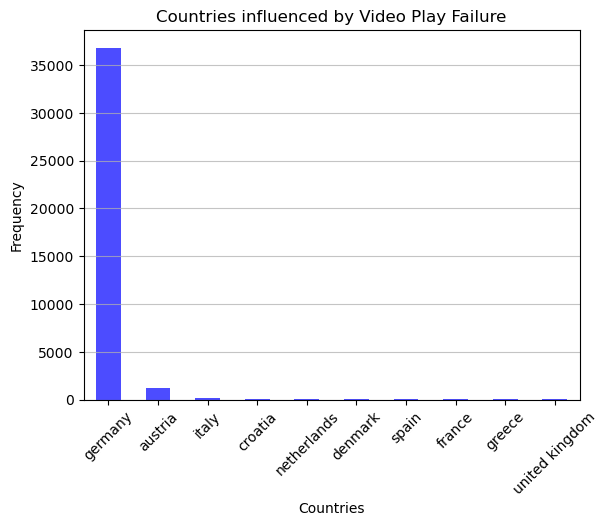

In [313]:
# Count the occurrences of each category
country_counts = df_['country'].value_counts()

# Plotting the bar chart (histogram is for numeric data)
country_counts[:10].plot(kind='bar', color='blue', alpha=0.7)
plt.title('Countries influenced by Video Play Failure')
plt.xlabel('Countries')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
# Rotate x-axis labels
plt.xticks(rotation=45)

In [314]:
36813/38733


0.9504298660057315

In [315]:
len(country_counts)

29

In [316]:
df_['state'].value_counts()

nordrhein-westfalen    8604
bremen                 8427
bayern                 4999
hessen                 3560
baden-wuerttemberg     3213
                       ... 
braga                     1
liege                     1
malaga                    1
hofudborgarsvaedi         1
liberecky kraj            1
Name: state, Length: 181, dtype: int64

In [317]:
df_['state'][:10]

0      niederoesterreich
1                hamburg
2                hamburg
3     baden-wuerttemberg
4                 bremen
5     schleswig-holstein
6    nordrhein-westfalen
7         sachsen-anhalt
8    nordrhein-westfalen
9                hamburg
Name: state, dtype: object

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'nordrhein-westfalen'),
  Text(1, 0, 'bremen'),
  Text(2, 0, 'bayern'),
  Text(3, 0, 'hessen'),
  Text(4, 0, 'baden-wuerttemberg'),
  Text(5, 0, 'niedersachsen'),
  Text(6, 0, 'hamburg'),
  Text(7, 0, 'berlin'),
  Text(8, 0, 'wien'),
  Text(9, 0, 'schleswig-holstein')])

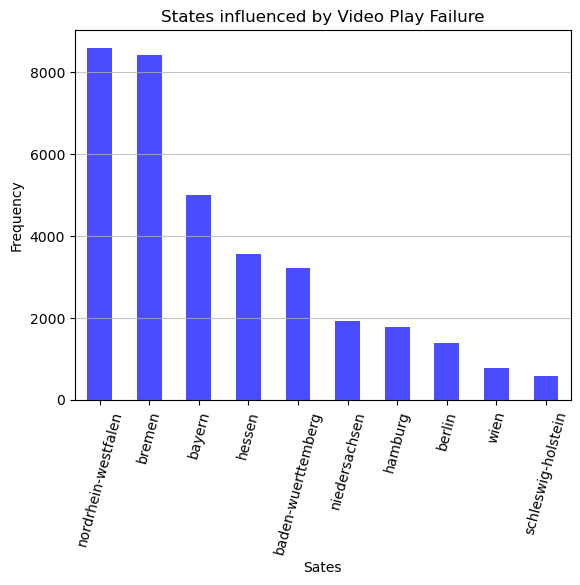

In [318]:
# Count the occurrences of each category
state_counts = df_['state'].value_counts()

# Plotting the bar chart (histogram is for numeric data)
state_counts[:10].plot(kind='bar', color='blue', alpha=0.7)
plt.title('States influenced by Video Play Failure')
plt.xlabel('Sates')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
# Rotate x-axis labels
plt.xticks(rotation=75)

In [319]:
state_counts

nordrhein-westfalen    8604
bremen                 8427
bayern                 4999
hessen                 3560
baden-wuerttemberg     3213
                       ... 
braga                     1
liege                     1
malaga                    1
hofudborgarsvaedi         1
liberecky kraj            1
Name: state, Length: 181, dtype: int64

In [320]:
(8604+8427+4999)/38773

0.5681788873700772

In [321]:
df_['deviceOS'].value_counts()

Tizen               20966
Chrome OS            6353
iOS                  3464
Windows 10           2288
Android              1172
webOS                 842
Xbox OS               750
OS X                  645
tvOS                  607
Linux                 508
PlayStation 4 OS      505
Roku OS               354
Windows 7             144
Windows 8.1           123
Windows 8               8
Apple TVOS              2
Fire OS                 2
Name: deviceOS, dtype: int64

In [322]:
df_.loc[df_['deviceOS'] == 'Windows 7', 'deviceOS'] = 'Windows 7_8'
df_.loc[df_['deviceOS'] == 'Windows 8.1', 'deviceOS'] = 'Windows 7_8'
df_.loc[df_['deviceOS'] == 'Windows 8', 'deviceOS'] = 'Windows 7_8'

In [323]:
df_['deviceOS'].value_counts()

Tizen               20966
Chrome OS            6353
iOS                  3464
Windows 10           2288
Android              1172
webOS                 842
Xbox OS               750
OS X                  645
tvOS                  607
Linux                 508
PlayStation 4 OS      505
Roku OS               354
Windows 7_8           275
Apple TVOS              2
Fire OS                 2
Name: deviceOS, dtype: int64

In [324]:
df_['deviceOS_new']=df_['deviceOS']
main_devices=['Tizen', 'Chrome OS', 'iOS', 'Windows 10', 'Android', 'webOS']
other_devices=['Xbox OS', 'OS X', 'tvOS','Linux', 'PlayStation 4 OS', 'Roku OS', 'Windows 7_8', 'Apple TVOS', 'Fire OS']
# Use .isin() to check if each element in the 'deviceOS' column is not in main_device
df_['deviceOS_new'] = df_['deviceOS_new'].where(df_['deviceOS_new'].isin(main_devices), 'Others')

In [325]:
device_new_counts=df_['deviceOS_new'].value_counts()

In [326]:
device_new_counts

Tizen         20966
Chrome OS      6353
Others         3648
iOS            3464
Windows 10     2288
Android        1172
webOS           842
Name: deviceOS_new, dtype: int64

Text(0.5, 1.0, 'Distribution of Device operating systems')

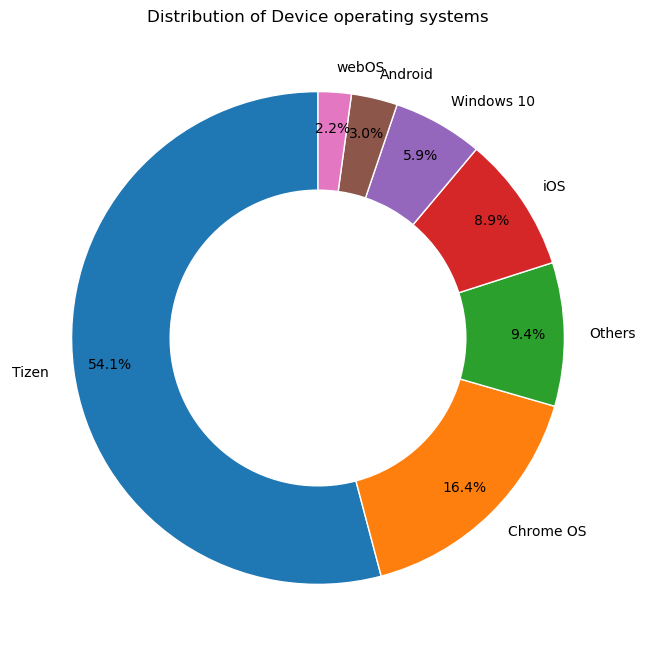

In [327]:
# Plotting a pie chart with automatic colors
plt.figure(figsize=(8, 8))
plt.pie(device_new_counts, labels=['Tizen', 'Chrome OS', 'Others', 'iOS', 'Windows 10', 'Android', 'webOS'], autopct='%1.1f%%', startangle=90, pctdistance=0.85, wedgeprops=dict(width=0.4, edgecolor='w'))
# Add a title
plt.title('Distribution of Device operating systems')

In [328]:
df_.columns

Index(['asset', 'deviceOS', 'country', 'state', 'city', 'asn', 'isp',
       'startTime', 'startupTimeMS', 'playingTimeMS', 'interrupts', 'cdn',
       'vpfErrorList', 'endTime', 'session_device_manufacturer',
       'session_device_conn', 'session_appversion', 'session_hardware_type',
       'session_is_live', 'session_channel_name', 'session_content_type',
       'session_pt_os', 'session_pt_os_ver', 'session_device_marketing_name',
       'session_player_name', 'startTime_hr_mt', 'endTime_hr_mt',
       'deviceOS_new'],
      dtype='object')

In [329]:
df_['asn'].value_counts()

3320      16889
6830       6370
3209       4514
8881       2066
6805       1538
          ...  
5385          1
8820          1
201729        1
62044         1
198471        1
Name: asn, Length: 409, dtype: int64

In [330]:
df.columns

Index(['day', 'proposition', 'viewerID', 'asset', 'deviceOS', 'country',
       'state', 'city', 'asn', 'isp', 'startTime', 'startupTimeMS',
       'playingTimeMS', 'interrupts', 'startupError', 'cdn', 'browser', 'vpf',
       'vpfErrorList', 'networkType', 'endTime', 'session_device_manufacturer',
       'session_device_brand', 'session_device_conn', 'session_appversion',
       'session_browser_version', 'session_hardware_type', 'session_source',
       'session_device_model', 'session_is_live', 'session_channel_name',
       'session_out_of_home', 'session_channel_id', 'session_content_type',
       'session_episode', 'session_goal_id', 'session_viewer_id',
       'session_pt_os', 'session_pt_os_ver', 'session_device_marketing_name',
       'session_player_name'],
      dtype='object')

In [331]:
df['cdn'].value_counts()

AKAMAI       20492
LIMELIGHT    18189
UNKNOWN         52
Name: cdn, dtype: int64

In [332]:
#Internet service Provider
df['isp'].value_counts()

Deutsche Telekom                           16889
UPC Broadband                               6370
Vodafone                                    4561
Versatel                                    2066
telefonica deutschland                      1538
                                           ...  
ASN: REGIONETZ, DE                             1
ASN: ASDETUK http://www.heficed.com, GB        1
ASN: AS12440 HNS-, DE                          1
ASN: O2-CZECH-REPUBLIC, CZ                     1
ASN: LINKEM-AS, IT                             1
Name: isp, Length: 397, dtype: int64

In [333]:
df_['isp_new']=df_['isp']
main_isp=['Deutsche Telekom', 'UPC Broadband', 'Vodafone', 'Versatel', 'telefonica deutschland']
#other_devices=['Xbox OS', 'OS X', 'tvOS','Linux', 'PlayStation 4 OS', 'Roku OS', 'Windows 7_8', 'Apple TVOS', 'Fire OS']
# Use .isin() to check if each element in the 'deviceOS' column is not in main_device
df_['isp_new'] = df_['isp_new'].where(df_['isp_new'].isin(main_isp), 'Others')

In [334]:
isp_counts=df_['isp_new'].value_counts()
isp_counts

Deutsche Telekom          16889
Others                     7309
UPC Broadband              6370
Vodafone                   4561
Versatel                   2066
telefonica deutschland     1538
Name: isp_new, dtype: int64

Text(0.5, 1.0, 'Distribution of Internet service providers')

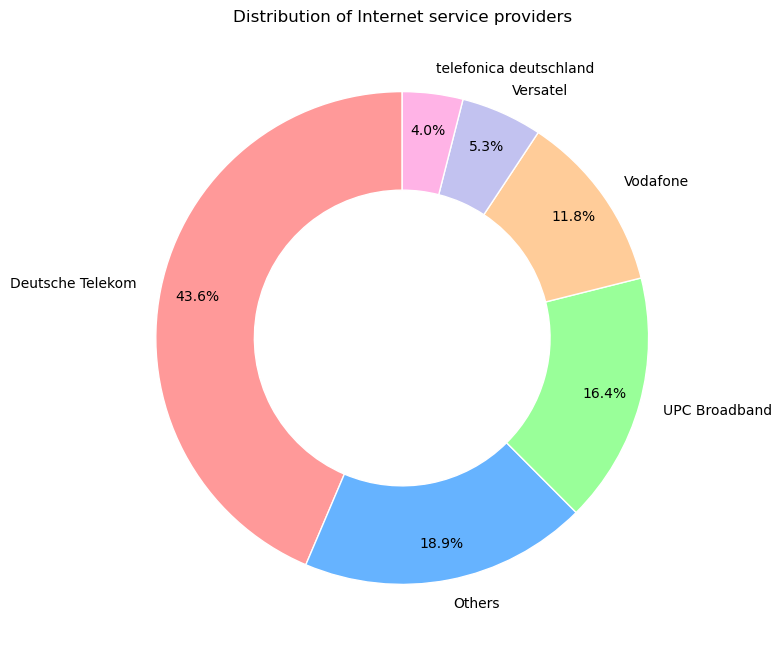

In [335]:
# Specify colors for each category
category_colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6']

# Plotting a pie chart with specified colors
plt.figure(figsize=(8, 8))
plt.pie(isp_counts, labels=['Deutsche Telekom', 'Others', 'UPC Broadband', 'Vodafone', 'Versatel', 'telefonica deutschland'], autopct='%1.1f%%', startangle=90, colors=category_colors, pctdistance=0.85, wedgeprops=dict(width=0.4, edgecolor='w'))
plt.title('Distribution of Internet service providers')

In [336]:
df_.columns

Index(['asset', 'deviceOS', 'country', 'state', 'city', 'asn', 'isp',
       'startTime', 'startupTimeMS', 'playingTimeMS', 'interrupts', 'cdn',
       'vpfErrorList', 'endTime', 'session_device_manufacturer',
       'session_device_conn', 'session_appversion', 'session_hardware_type',
       'session_is_live', 'session_channel_name', 'session_content_type',
       'session_pt_os', 'session_pt_os_ver', 'session_device_marketing_name',
       'session_player_name', 'startTime_hr_mt', 'endTime_hr_mt',
       'deviceOS_new', 'isp_new'],
      dtype='object')

In [337]:
df_['session_hardware_type'].value_counts()

TV                       25037
Set Top Box               4647
Desktop                   3232
Tablet                    2767
Mobile Phone              1788
Games Console             1255
Single-board Computer        7
Name: session_hardware_type, dtype: int64

Text(0.5, 1.0, 'Distribution of Devices')

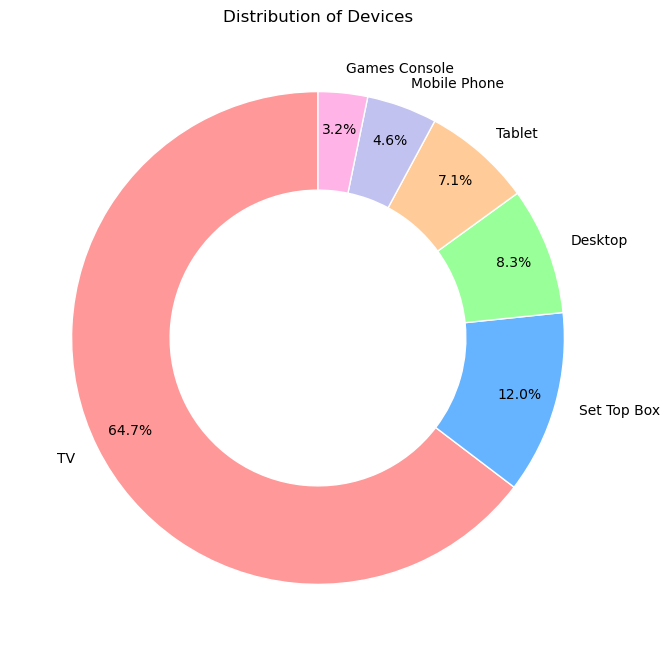

In [338]:
device_counts=df_['session_hardware_type'].value_counts()
# Specify colors for each category
category_colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6']

# Plotting a pie chart with specified colors
plt.figure(figsize=(8, 8))
plt.pie(device_counts[:6], labels=['TV', 'Set Top Box', 'Desktop', 'Tablet', 'Mobile Phone', 'Games Console'], autopct='%1.1f%%', startangle=90, colors=category_colors, pctdistance=0.85, wedgeprops=dict(width=0.4, edgecolor='w'))
plt.title('Distribution of Devices')

In [339]:
# adapter or app
# app sky ticket, skyq
# adapter: chromecast
#service: skygo
df_['session_player_name'].value_counts()

skyticket-de-crosstv    12916
skyq-de-samsungtv        9956
nowtv-de-chromecast      6353
skygo-de-ios             3074
skygo-de-desktop         2168
skyticket-de-desktop     1038
skygo-de-android          707
skyq-de-gwstb             508
skyticket-de-appletv      493
skyticket-de-android      412
skyticket-de-ios          390
skyticket-de-roku         354
skyq-de-lgtv              246
skyq-de-appletv           116
skyq-de-ipstb               2
Name: session_player_name, dtype: int64

In [340]:
df_['player']=df_['session_player_name']
df_.loc[df_['player'] == 'skyticket-de-crosstv', 'player'] = 'skyticket'
df_.loc[df_['player'] == 'skyticket-de-desktop', 'player'] = 'skyticket'
df_.loc[df_['player'] == 'skyticket-de-appletv', 'player'] = 'skyticket'
df_.loc[df_['player'] == 'skyticket-de-android', 'player'] = 'skyticket'
df_.loc[df_['player'] == 'skyticket-de-ios', 'player'] = 'skyticket'
df_.loc[df_['player'] == 'skyticket-de-roku', 'player'] = 'skyticket'

df_.loc[df_['player'] == 'skyq-de-samsungtv', 'player'] = 'skyq'
df_.loc[df_['player'] == 'skyq-de-gwstb', 'player'] = 'skyq'
df_.loc[df_['player'] == 'skyq-de-lgtv', 'player'] = 'skyq'
df_.loc[df_['player'] == 'skyq-de-appletv', 'player'] = 'skyq'
df_.loc[df_['player'] == 'skyq-de-ipstb', 'player'] = 'skyq'

df_.loc[df_['player'] == 'skygo-de-ios', 'player'] = 'skygo'
df_.loc[df_['player'] == 'skygo-de-desktop', 'player'] = 'skygo'
df_.loc[df_['player'] == 'skygo-de-android', 'player'] = 'skygo'



In [341]:
player_counts=df_['player'].value_counts()

Text(0.5, 1.0, 'Distribution of players')

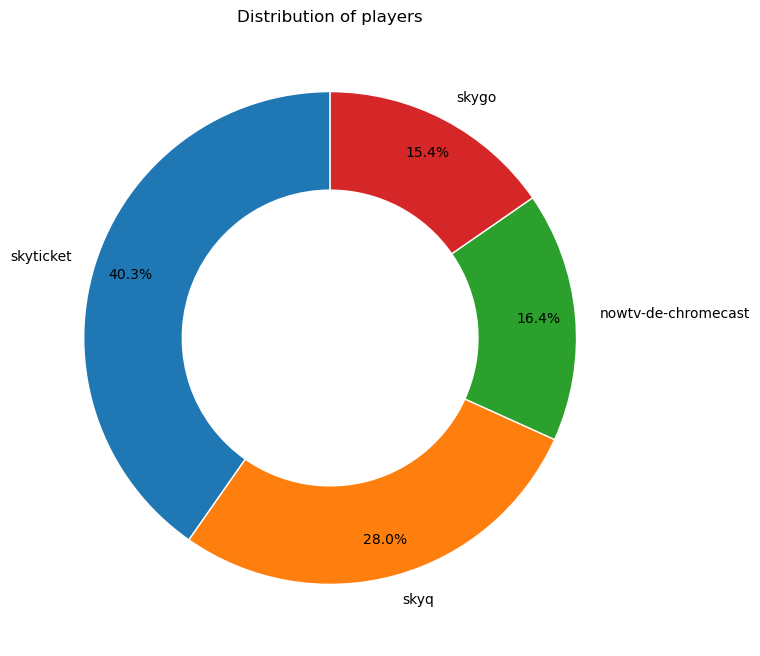

In [342]:
# Plotting a pie chart with automatic colors
plt.figure(figsize=(8, 8))
plt.pie(player_counts, labels=['skyticket', 'skyq', 'nowtv-de-chromecast', 'skygo'], autopct='%1.1f%%', startangle=90, pctdistance=0.85, wedgeprops=dict(width=0.4, edgecolor='w'))
# Add a title
plt.title('Distribution of players')

In [343]:
df_['player'].value_counts()

skyticket              15603
skyq                   10828
nowtv-de-chromecast     6353
skygo                   5949
Name: player, dtype: int64

Text(0.5, 1.0, 'Distribution of Devices and Players')

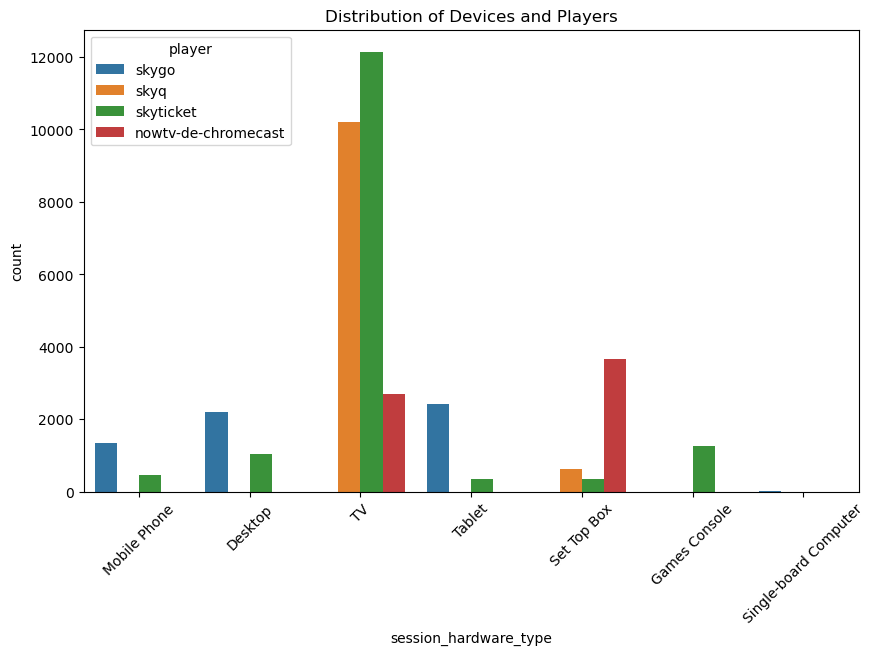

In [344]:
# bar chart for Device and players
# Create a count plot for both categorical features in one plot
plt.figure(figsize=(10, 6))
sns.countplot(x='session_hardware_type', hue='player', data=df_)
# Rotate x-axis labels
plt.xticks(rotation=45)
plt.title('Distribution of Devices and Players')

In [345]:
df_.columns

Index(['asset', 'deviceOS', 'country', 'state', 'city', 'asn', 'isp',
       'startTime', 'startupTimeMS', 'playingTimeMS', 'interrupts', 'cdn',
       'vpfErrorList', 'endTime', 'session_device_manufacturer',
       'session_device_conn', 'session_appversion', 'session_hardware_type',
       'session_is_live', 'session_channel_name', 'session_content_type',
       'session_pt_os', 'session_pt_os_ver', 'session_device_marketing_name',
       'session_player_name', 'startTime_hr_mt', 'endTime_hr_mt',
       'deviceOS_new', 'isp_new', 'player'],
      dtype='object')

In [346]:
df.columns

Index(['day', 'proposition', 'viewerID', 'asset', 'deviceOS', 'country',
       'state', 'city', 'asn', 'isp', 'startTime', 'startupTimeMS',
       'playingTimeMS', 'interrupts', 'startupError', 'cdn', 'browser', 'vpf',
       'vpfErrorList', 'networkType', 'endTime', 'session_device_manufacturer',
       'session_device_brand', 'session_device_conn', 'session_appversion',
       'session_browser_version', 'session_hardware_type', 'session_source',
       'session_device_model', 'session_is_live', 'session_channel_name',
       'session_out_of_home', 'session_channel_id', 'session_content_type',
       'session_episode', 'session_goal_id', 'session_viewer_id',
       'session_pt_os', 'session_pt_os_ver', 'session_device_marketing_name',
       'session_player_name'],
      dtype='object')

## Question 2: What time did we start to see a significant increase?

In [353]:
# Count the number of users starting at each hour and minute
issue_counts = df_['startTime_hr_mt'].value_counts().sort_index()

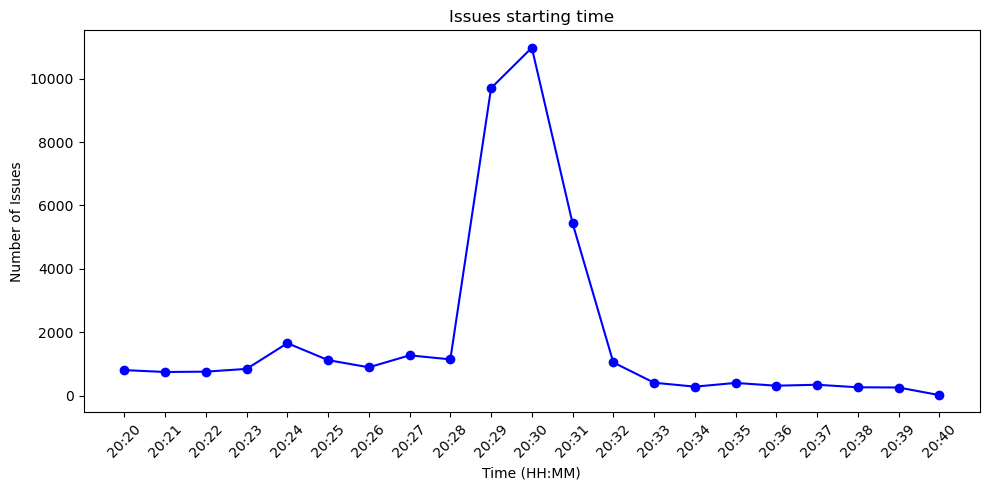

In [354]:
# Plotting a line chart
plt.figure(figsize=(10, 5))
plt.plot(issue_counts.index, issue_counts.values, marker='o', linestyle='-', color='b')

# Adding labels and title
plt.xlabel('Time (HH:MM)')
plt.ylabel('Number of Issues')
plt.title('Issues starting time')

# Display the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Ensure tight layout

In [350]:
# preprocessing interrupts
# interrupts_class
bins = [-1,0, 3, 137]
# Create a new column with bin labels
df_['interrupts_class'] = pd.cut(df_['interrupts'], bins=bins, labels=['0_time','1_3_times', 'above_3_times'])

In [351]:
interrupt_counts=df_['interrupts_class'].value_counts()

Text(0.5, 1.0, 'Distribution of interrupts')

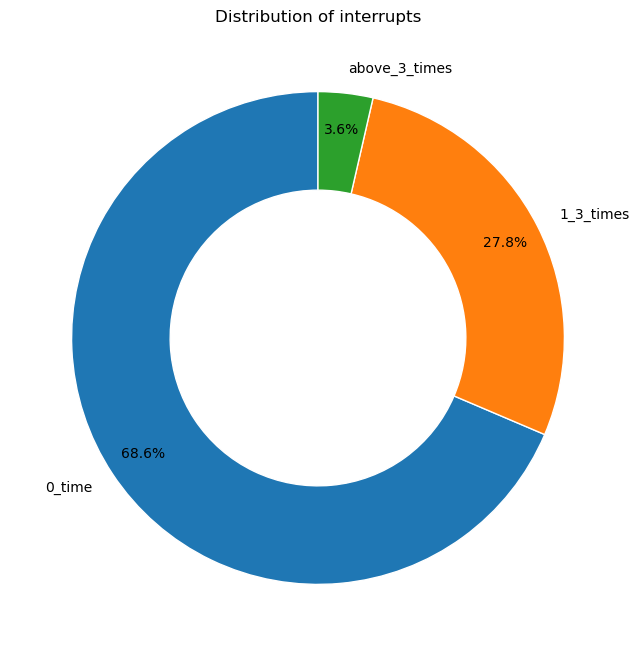

In [352]:
# Plotting a pie chart with automatic colors
plt.figure(figsize=(8, 8))
plt.pie(interrupt_counts, labels=['0_time', '1_3_times', 'above_3_times'], autopct='%1.1f%%', startangle=90, pctdistance=0.85, wedgeprops=dict(width=0.4, edgecolor='w'))
# Add a title
plt.title('Distribution of interrupts')

(array([0, 1, 2]),
 [Text(0, 0, 'AKAMAI'), Text(1, 0, 'LIMELIGHT'), Text(2, 0, 'UNKNOWN')])

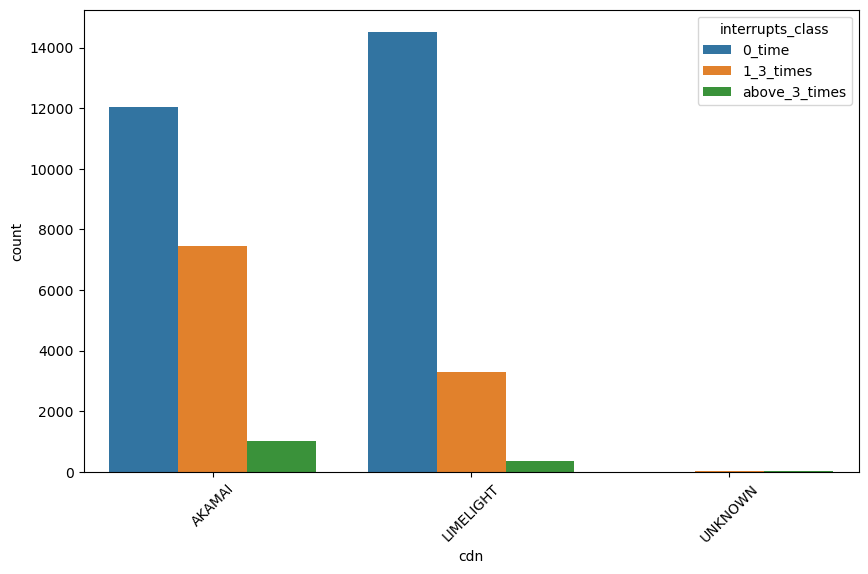

In [355]:
# bar chart for Device and players
# Create a count plot for both categorical features in one plot
plt.figure(figsize=(10, 6))
sns.countplot(x='cdn', hue='interrupts_class', data=df_)
# Rotate x-axis labels
plt.xticks(rotation=45)
#plt.title('Distribution of Devices and Players')

Text(0.5, 1.0, 'Distribution of Devices and Players')

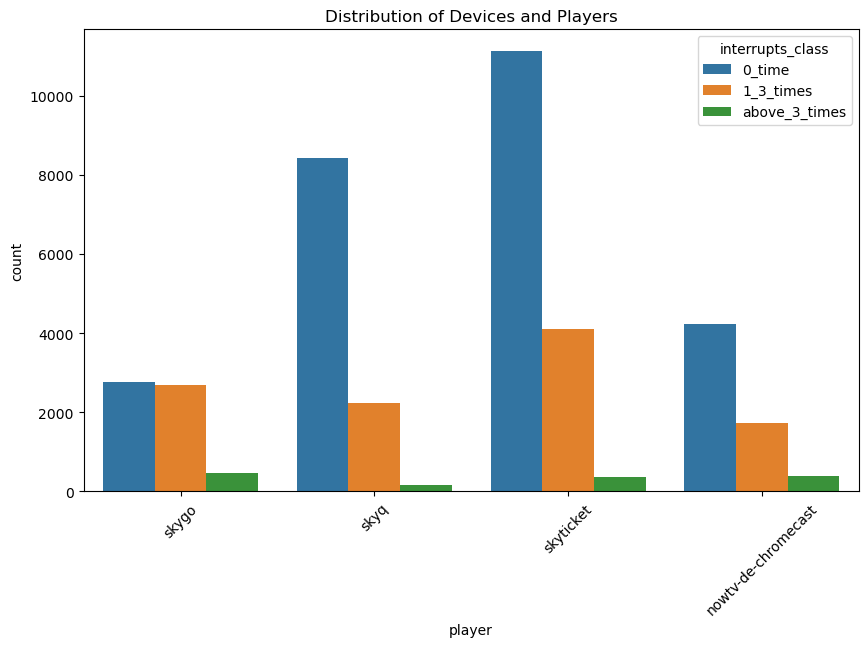

In [356]:
# bar chart for Device and players
# Create a count plot for both categorical features in one plot
plt.figure(figsize=(10, 6))
sns.countplot(x='player', hue='interrupts_class', data=df_)
# Rotate x-axis labels
plt.xticks(rotation=45)
plt.title('Distribution of Devices and Players')

Text(0.5, 1.0, 'Distribution of Operating systems and numbers of interrupts')

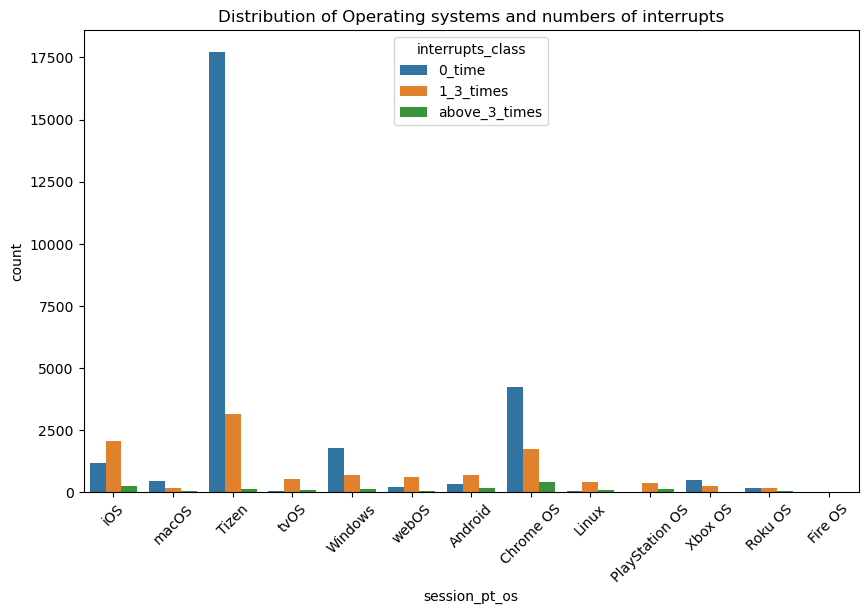

In [357]:
# bar chart for Device and players
# Create a count plot for both categorical features in one plot
plt.figure(figsize=(10, 6))
sns.countplot(x='session_pt_os', hue='interrupts_class', data=df_)
# Rotate x-axis labels
plt.xticks(rotation=45)
plt.title('Distribution of Operating systems and numbers of interrupts')

Text(0.5, 1.0, 'Distribution of Devices and Players')

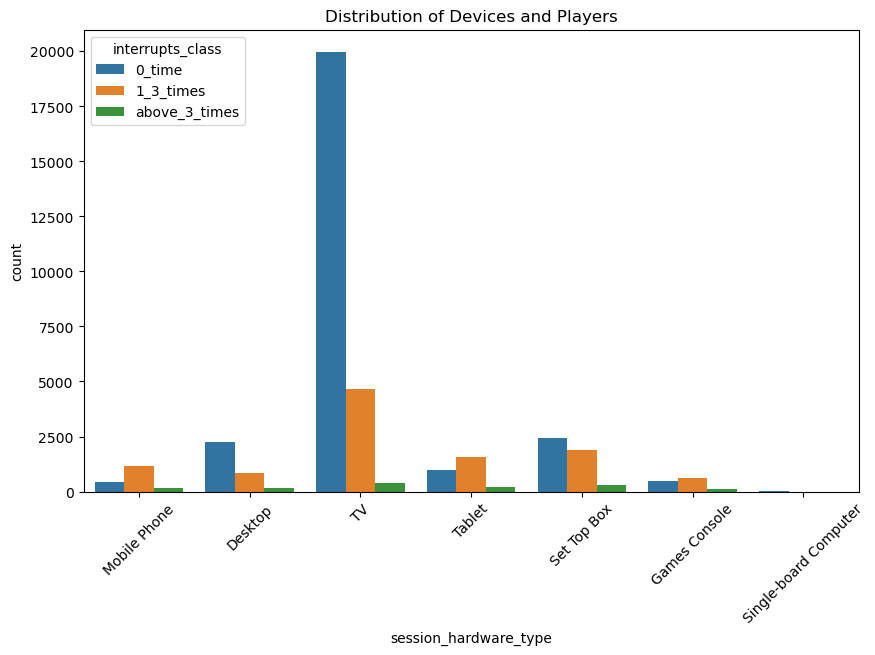

In [358]:
# bar chart for Device and players
# Create a count plot for both categorical features in one plot
plt.figure(figsize=(10, 6))
sns.countplot(x='session_hardware_type', hue='interrupts_class', data=df_)
# Rotate x-axis labels
plt.xticks(rotation=45)
plt.title('Distribution of Devices and Players')

In [359]:
df_.columns

Index(['asset', 'deviceOS', 'country', 'state', 'city', 'asn', 'isp',
       'startTime', 'startupTimeMS', 'playingTimeMS', 'interrupts', 'cdn',
       'vpfErrorList', 'endTime', 'session_device_manufacturer',
       'session_device_conn', 'session_appversion', 'session_hardware_type',
       'session_is_live', 'session_channel_name', 'session_content_type',
       'session_pt_os', 'session_pt_os_ver', 'session_device_marketing_name',
       'session_player_name', 'startTime_hr_mt', 'endTime_hr_mt',
       'deviceOS_new', 'isp_new', 'player', 'interrupts_class'],
      dtype='object')

In [360]:
feature='session_content_type'
df[feature].isna().sum()

17467

In [361]:
df[feature].value_counts()

Movies                  9300
Sports                  7770
unknown                 3074
SPORTS                   380
SPORT                    349
Entertainment            165
Filme                     86
Sport                     70
News                      19
ENTERTAINMENT             14
Film                       9
Unterhaltung & Serie       9
Doku                       6
Unterhaltung               5
Kids                       4
Marktplatz                 1
Regionales                 1
News & International       1
CINEMA                     1
Serien                     1
News & Intl.               1
Name: session_content_type, dtype: int64

In [362]:
df_['startTime_hr_mt'].value_counts()

20:30    10977
20:29     9702
20:31     5441
20:24     1657
20:27     1273
20:28     1147
20:25     1123
20:32     1050
20:26      896
20:23      846
20:20      808
20:22      759
20:21      748
20:33      410
20:35      403
20:37      346
20:36      316
20:34      286
20:38      266
20:39      259
20:40       20
Name: startTime_hr_mt, dtype: int64

In [363]:
df_['startTime_hr_mt_new']=df_['startTime_hr_mt']
df_.loc[df_['startTime_hr_mt_new'] == '20:29', 'startTime_hr_mt_new'] = '20:30'
df_.loc[df_['startTime_hr_mt_new'] == '20:31', 'startTime_hr_mt_new'] = '20:30'

df_.loc[df_['startTime_hr_mt_new'] == '20:24', 'startTime_hr_mt_new'] = 'before 20:30'
df_.loc[df_['startTime_hr_mt_new'] == '20:27', 'startTime_hr_mt_new'] = 'before 20:30'
df_.loc[df_['startTime_hr_mt_new'] == '20:25', 'startTime_hr_mt_new'] = 'before 20:30'
df_.loc[df_['startTime_hr_mt_new'] == '20:28', 'startTime_hr_mt_new'] = 'before 20:30'
df_.loc[df_['startTime_hr_mt_new'] == '20:26', 'startTime_hr_mt_new'] = 'before 20:30'
df_.loc[df_['startTime_hr_mt_new'] == '20:23', 'startTime_hr_mt_new'] = 'before 20:30'
df_.loc[df_['startTime_hr_mt_new'] == '20:20', 'startTime_hr_mt_new'] = 'before 20:30'
df_.loc[df_['startTime_hr_mt_new'] == '20:22', 'startTime_hr_mt_new'] = 'before 20:30'
df_.loc[df_['startTime_hr_mt_new'] == '20:21', 'startTime_hr_mt_new'] = 'before 20:30'

df_.loc[df_['startTime_hr_mt_new'] == '20:33', 'startTime_hr_mt_new'] = 'after 20:30'
df_.loc[df_['startTime_hr_mt_new'] == '20:35', 'startTime_hr_mt_new'] = 'after 20:30'
df_.loc[df_['startTime_hr_mt_new'] == '20:32', 'startTime_hr_mt_new'] = 'after 20:30'
df_.loc[df_['startTime_hr_mt_new'] == '20:37', 'startTime_hr_mt_new'] = 'after 20:30'
df_.loc[df_['startTime_hr_mt_new'] == '20:36', 'startTime_hr_mt_new'] = 'after 20:30'
df_.loc[df_['startTime_hr_mt_new'] == '20:34', 'startTime_hr_mt_new'] = 'after 20:30'
df_.loc[df_['startTime_hr_mt_new'] == '20:38', 'startTime_hr_mt_new'] = 'after 20:30'
df_.loc[df_['startTime_hr_mt_new'] == '20:39', 'startTime_hr_mt_new'] = 'after 20:30'
df_.loc[df_['startTime_hr_mt_new'] == '20:40', 'startTime_hr_mt_new'] = 'after 20:30'

In [364]:
df['day'].value_counts()

2020-08-19    38733
Name: day, dtype: int64

In [365]:
df_['startTime_hr_mt_new'].value_counts()

20:30           26120
before 20:30     9257
after 20:30      3356
Name: startTime_hr_mt_new, dtype: int64

Text(0.5, 1.0, 'Distribution of starting time')

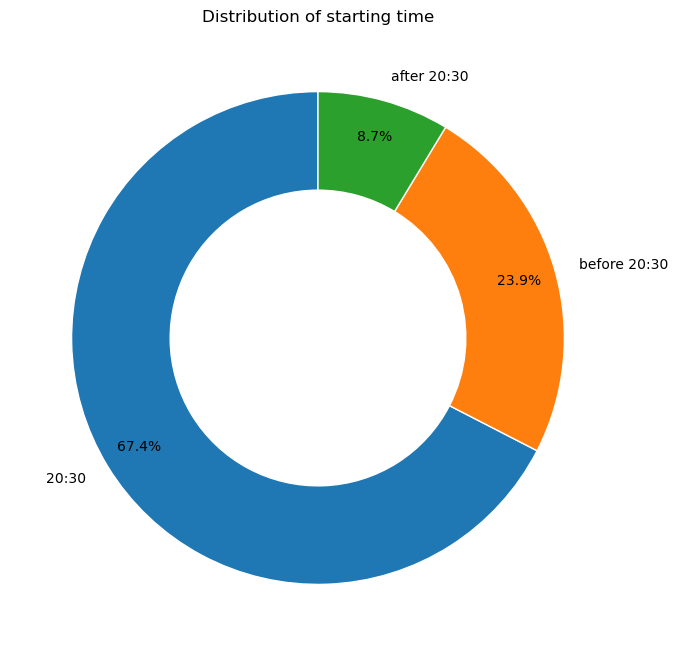

In [366]:
startTime_counts=df_['startTime_hr_mt_new'].value_counts()
# Plotting a pie chart with automatic colors
plt.figure(figsize=(8, 8))
plt.pie(startTime_counts, labels=['20:30', 'before 20:30', 'after 20:30'], autopct='%1.1f%%', startangle=90, pctdistance=0.85, wedgeprops=dict(width=0.4, edgecolor='w'))
# Add a title
plt.title('Distribution of starting time')

Text(0.5, 1.0, 'Distribution of starting time')

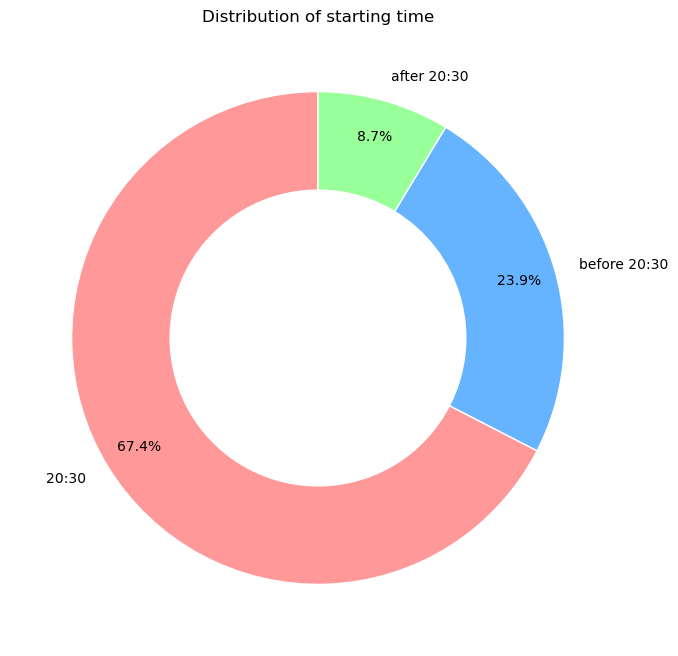

In [367]:
device_counts=df_['startTime_hr_mt_new'].value_counts()
# Specify colors for each category
category_colors = ['#ff9999', '#66b3ff', '#99ff99']

# Plotting a pie chart with specified colors
plt.figure(figsize=(8, 8))
plt.pie(device_counts[:6], labels=['20:30', 'before 20:30', 'after 20:30'], autopct='%1.1f%%', startangle=90, colors=category_colors, pctdistance=0.85, wedgeprops=dict(width=0.4, edgecolor='w'))
plt.title('Distribution of starting time')

### Question 3: When did the issue subside, and how long was the duration?

In [368]:
df_['endTime_hr_mt'].value_counts()

20:30    16229
20:29     7683
20:36     4849
20:31     1382
20:35      637
         ...  
21:46        4
21:59        4
21:58        4
22:00        4
21:44        3
Name: endTime_hr_mt, Length: 101, dtype: int64

In [174]:
len(df_['endTime_hr_mt'].value_counts())

101

In [371]:
# Count the number of users starting at each hour and minute
issue_end_counts = df_['endTime_hr_mt'].value_counts().sort_index()

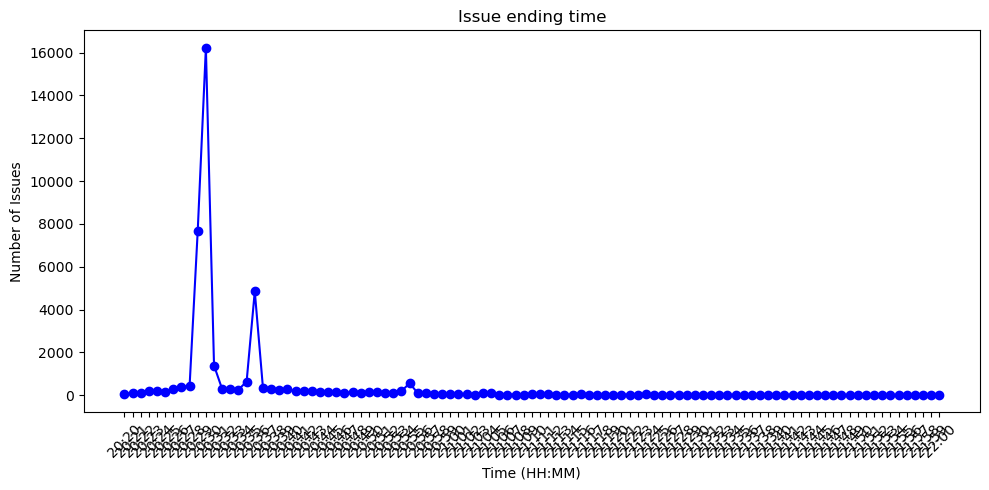

In [372]:
# Plotting a line chart
plt.figure(figsize=(10, 5))
plt.plot(issue_end_counts.index, issue_end_counts.values, marker='o', linestyle='-', color='b')

# Adding labels and title
plt.xlabel('Time (HH:MM)')
plt.ylabel('Number of Issues')
plt.title('Issue ending time')

# Display the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Ensure tight layout

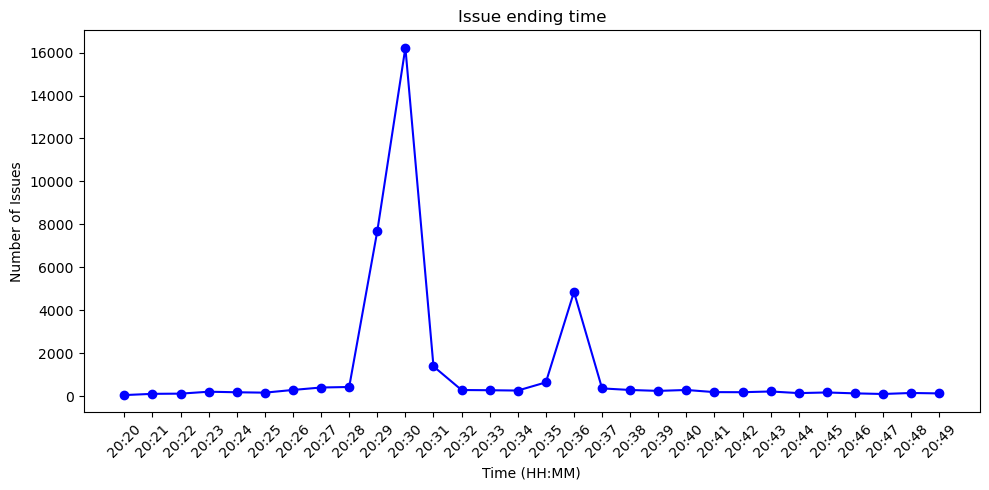

In [376]:

# Count the number of users starting at each hour and minute
issue_end_counts = df_['endTime_hr_mt'].value_counts().sort_index()[:30]

# Plotting a line chart
plt.figure(figsize=(10, 5))
plt.plot(issue_end_counts.index, issue_end_counts.values, marker='o', linestyle='-', color='b')

# Adding labels and title
plt.xlabel('Time (HH:MM)')
plt.ylabel('Number of Issues')
plt.title('Issue ending time')

# Display the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Ensure tight layout

In [377]:

#preprocessing endTime
df_['endTime_hr_mt_new']=df_['endTime_hr_mt']# Convert the 'time' column to datetime format
df_['endTime_hr_mt_new'] = pd.to_datetime(df_['endTime_hr_mt_new'], format='%H:%M')
# Set the reference times for classification
before_time = pd.to_datetime('20:28', format='%H:%M')
after_time = pd.to_datetime('20:31', format='%H:%M')

# Create a new column 'time_category' based on classification
df_['endTime_hr_mt_class'] = pd.cut(df_['endTime_hr_mt_new'], bins=[pd.to_datetime('00:00', format='%H:%M'), before_time, after_time, pd.to_datetime('23:59', format='%H:%M')], labels=['Before 20:30', 'At around 20:30', 'After 20:30'])


In [378]:
df_['endTime_hr_mt_class'].value_counts()

At around 20:30    25294
After 20:30        11539
Before 20:30        1900
Name: endTime_hr_mt_class, dtype: int64

Text(0.5, 1.0, 'Distribution of ending time')

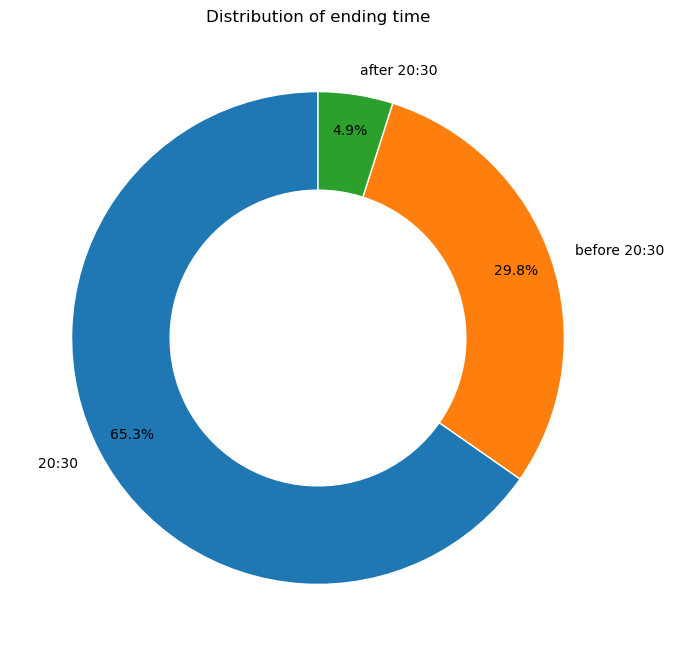

In [379]:
endTime_counts=df_['endTime_hr_mt_class'].value_counts()
# Plotting a pie chart with automatic colors
plt.figure(figsize=(8, 8))
plt.pie(endTime_counts, labels=['20:30', 'before 20:30', 'after 20:30'], autopct='%1.1f%%', startangle=90, pctdistance=0.85, wedgeprops=dict(width=0.4, edgecolor='w'))
# Add a title
plt.title('Distribution of ending time')

## Question 3: When did the issue subside, and how long was the duration?

In [380]:
# Convert 'startTime_hr_mt' and 'endTime_hr_mt' columns to datetime objects
df_['startTime_hr_mt'] = pd.to_datetime(df_['startTime_hr_mt'], format='%H:%M')
df_['endTime_hr_mt'] = pd.to_datetime(df_['endTime_hr_mt'], format='%H:%M')
# Calculate the time difference (duration)
df_['duration_interrupt'] = df_['endTime_hr_mt'] - df_['startTime_hr_mt']


In [381]:
df_['duration_interrupt'].value_counts()

0 days 00:00:00    15593
0 days 00:01:00     5808
0 days 00:05:00     4884
0 days 00:04:00     1672
0 days 00:06:00     1650
                   ...  
0 days 01:30:00        2
0 days 01:28:00        2
0 days 01:34:00        1
0 days 01:35:00        1
0 days 01:31:00        1
Name: duration_interrupt, Length: 95, dtype: int64

In [382]:
# Rename the column
df_ = df_.rename(columns={'duration_interrupt': 'duration'})

In [383]:
# duration_class
df_['duration_exact']=df_['endTime']-df_['startTime']
# Define custom bin edges in terms of timedelta
bins = [pd.Timedelta(minutes=0), pd.Timedelta(minutes=1), pd.Timedelta(minutes=5), pd.Timedelta(minutes=10),
        pd.Timedelta(minutes=15), pd.Timedelta(minutes=95)]
# Create a new column with bin labels
df_['duration_class'] = pd.cut(df_['duration_exact'], bins=bins, labels=['below_1_min', '1_5_min', '5_10_min', '10_15_min', 'above_15_min'])

In [384]:
# duration_class
df_['duration_exact']=df_['endTime']-df_['startTime']
# Define custom bin edges in terms of timedelta
bins = [pd.Timedelta(minutes=0), pd.Timedelta(minutes=1), pd.Timedelta(minutes=5), pd.Timedelta(minutes=10), pd.Timedelta(minutes=95)]
# Create a new column with bin labels
df_['duration_class_2'] = pd.cut(df_['duration_exact'], bins=bins, labels=['below_1_min', '1_5_min', '5_10_min', 'above_10_min'])

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'below_1_min'),
  Text(1, 0, '1_5_min'),
  Text(2, 0, '5_10_min'),
  Text(3, 0, 'above_15_min'),
  Text(4, 0, '10_15_min')])

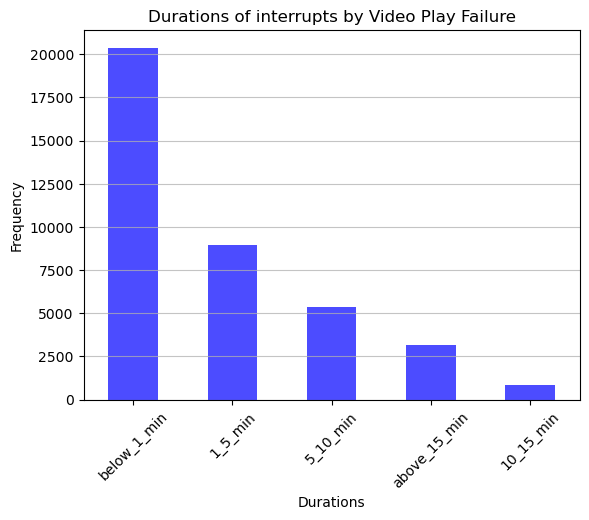

In [385]:
#bar chart for duration class:
# Count the occurrences of each category
duration_counts = df_['duration_class'].value_counts()

# Plotting the bar chart (histogram is for numeric data)
duration_counts[:10].plot(kind='bar', color='blue', alpha=0.7)
plt.title('Durations of interrupts by Video Play Failure')
plt.xlabel('Durations')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
# Rotate x-axis labels
plt.xticks(rotation=45)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'below_1_min'),
  Text(1, 0, '1_5_min'),
  Text(2, 0, '5_10_min'),
  Text(3, 0, 'above_10_min')])

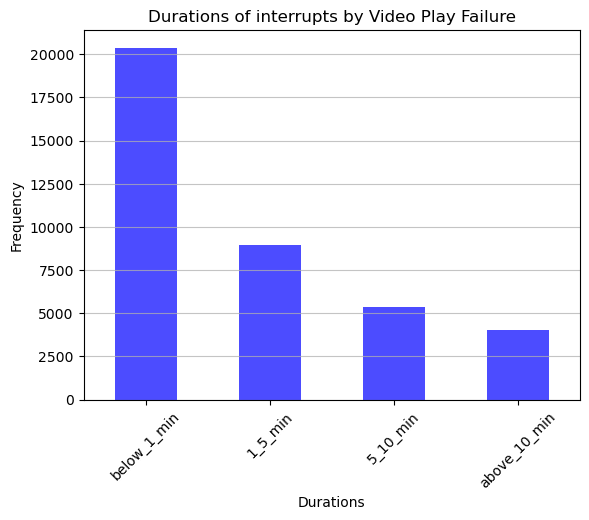

In [386]:
#bar chart for duration class:
# Count the occurrences of each category
duration_counts = df_['duration_class_2'].value_counts()

# Plotting the bar chart (histogram is for numeric data)
duration_counts[:10].plot(kind='bar', color='blue', alpha=0.7)
plt.title('Durations of interrupts by Video Play Failure')
plt.xlabel('Durations')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
# Rotate x-axis labels
plt.xticks(rotation=45)

Text(0.5, 1.0, 'Distributions of Durations')

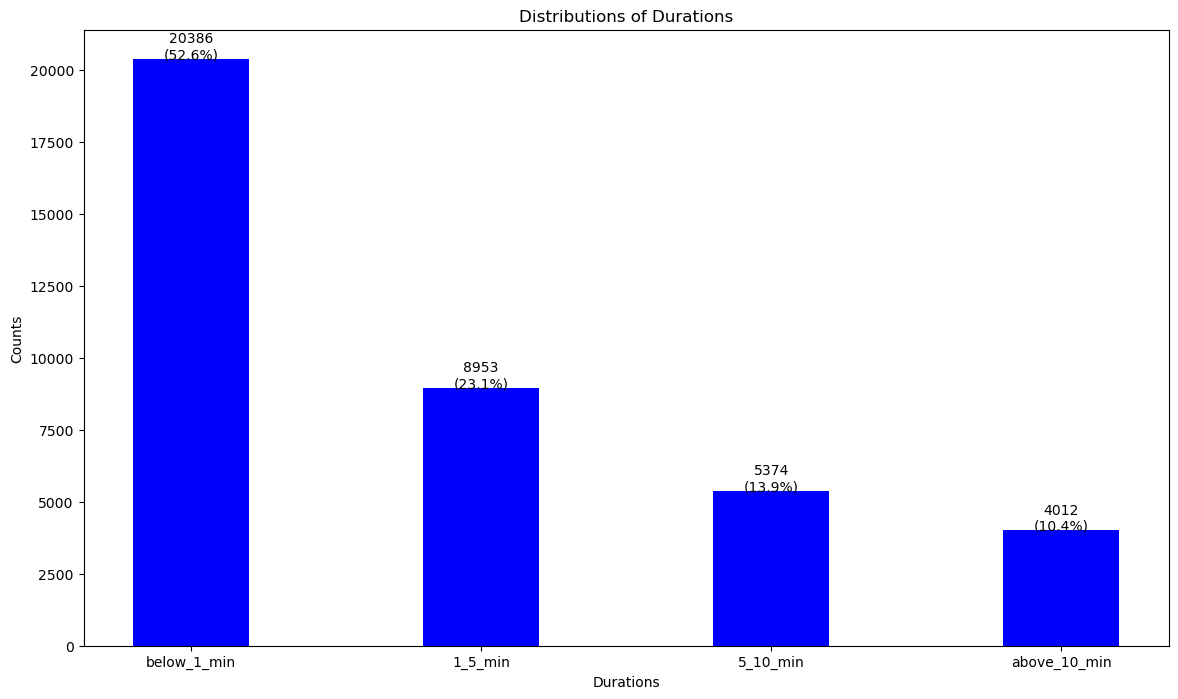

In [387]:
# Get value counts and calculate percentages
total = len(df_['duration_class_2'])
percentages = (duration_counts / total) * 100# Plotting a bar chart
plt.figure(figsize=(14, 8))
bars = plt.bar(duration_counts.index, duration_counts, color='blue',width=0.4)

# Add counts and percentages above the bars
for bar, count, percentage in zip(bars, duration_counts, percentages):
    plt.text(bar.get_x() + bar.get_width() / 2 , bar.get_height() + 0.5, f'{count}\n({percentage:.1f}%)', ha='center')

# Add labels and title
plt.xlabel('Durations')
plt.ylabel('Counts')
plt.title('Distributions of Durations')

Text(0.5, 1.0, 'Distributions of Durations')

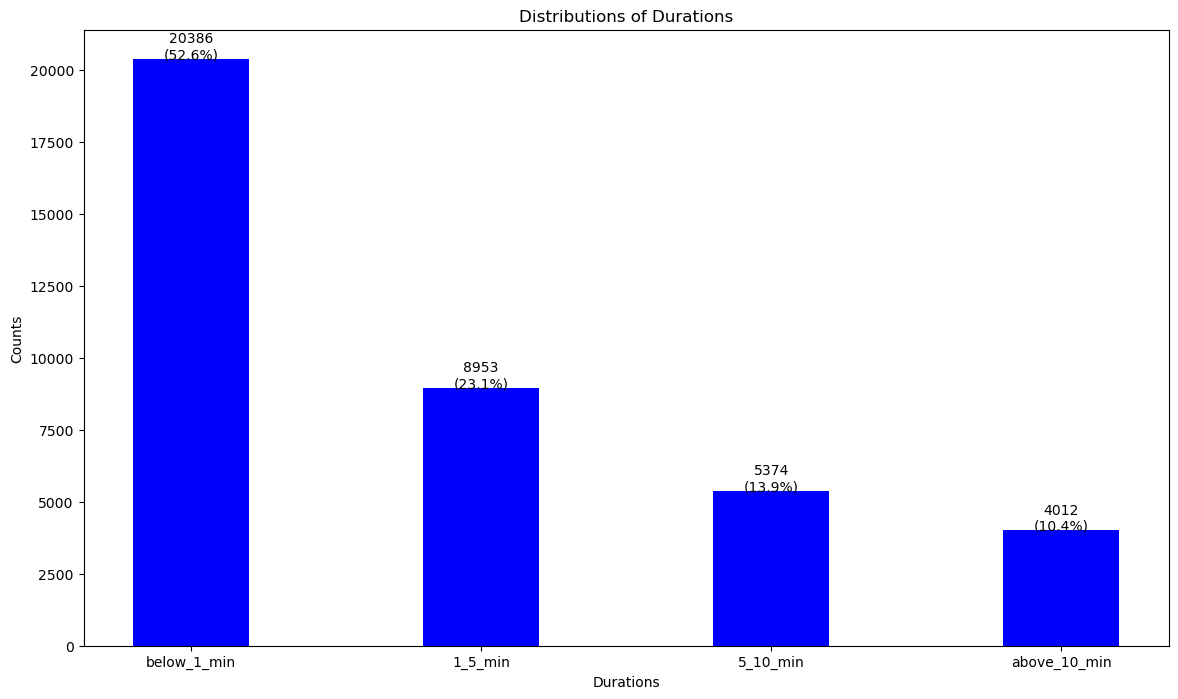

In [388]:

# Get value counts and calculate percentages
total = len(df_['duration_class'])
percentages = (duration_counts / total) * 100# Plotting a bar chart
plt.figure(figsize=(14, 8))
bars = plt.bar(duration_counts.index, duration_counts, color='blue',width=0.4)

# Add counts and percentages above the bars
for bar, count, percentage in zip(bars, duration_counts, percentages):
    plt.text(bar.get_x() + bar.get_width() / 2 , bar.get_height() + 0.5, f'{count}\n({percentage:.1f}%)', ha='center')

# Add labels and title
plt.xlabel('Durations')
plt.ylabel('Counts')
plt.title('Distributions of Durations')

In [389]:
df_[df_['duration_class']=='below_1_min']['interrupts_class'].value_counts()

0_time           17036
1_3_times         3165
above_3_times      185
Name: interrupts_class, dtype: int64

Text(0.5, 1.0, 'Distribution of Durations and Interrupts')

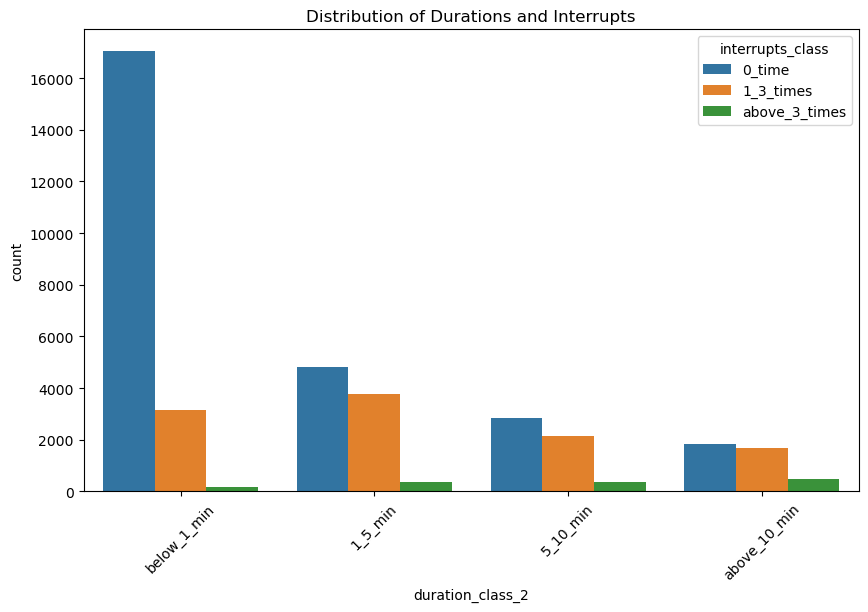

In [390]:
# bar chart for Device and players
# Create a count plot for both categorical features in one plot
plt.figure(figsize=(10, 6))
sns.countplot(x='duration_class_2', hue='interrupts_class', data=df_)
# Rotate x-axis labels
plt.xticks(rotation=45)
plt.title('Distribution of Durations and Interrupts')

In [391]:
# around 44% the users having less than 1 minute, no interrupts issues
17382 /38733

0.44876461931686157

Text(0.5, 1.0, 'Distribution of Durations and Interrupts')

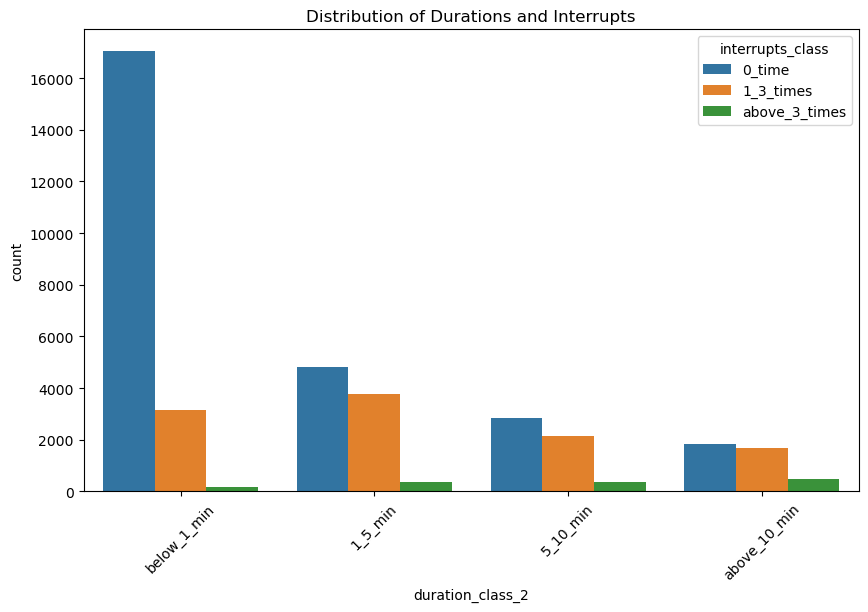

In [392]:
# bar chart for Device and players
# Create a count plot for both categorical features in one plot
plt.figure(figsize=(10, 6))
sns.countplot(x='duration_class_2', hue='interrupts_class', data=df_)
# Rotate x-axis labels
plt.xticks(rotation=45)
plt.title('Distribution of Durations and Interrupts')

## Question 4 How can we split the data? Was it isolated to a specific device, operating system or player?

Text(0.5, 1.0, 'Distribution of the devices and Durations')

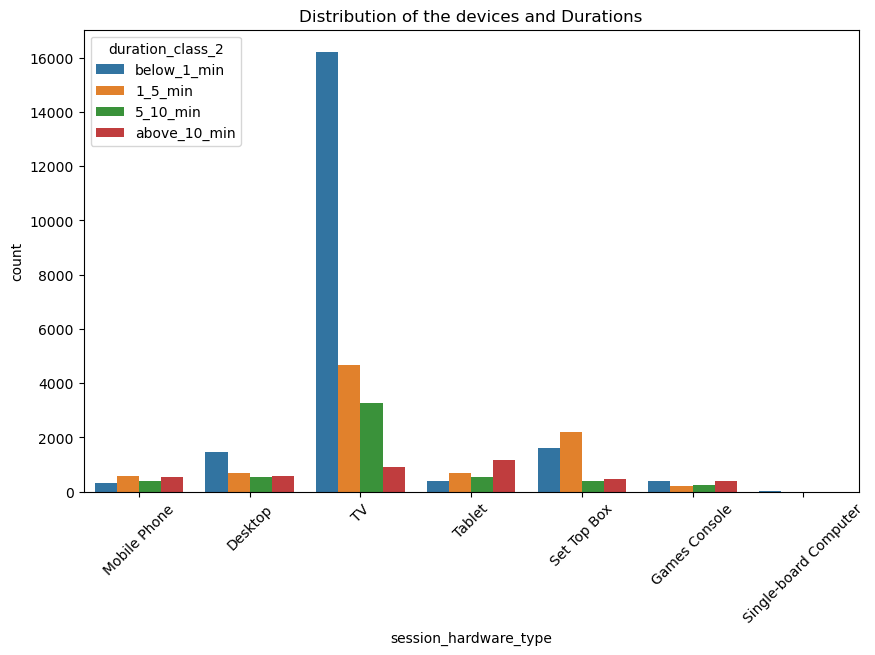

In [393]:
# Create a count plot for both categorical features in one plot
plt.figure(figsize=(10, 6))
sns.countplot(x='session_hardware_type', hue='duration_class_2', data=df_)
# Rotate x-axis labels
plt.xticks(rotation=45)
plt.title('Distribution of the devices and Durations')

Text(0.5, 1.0, 'Distribution of the operating systems and Durations')

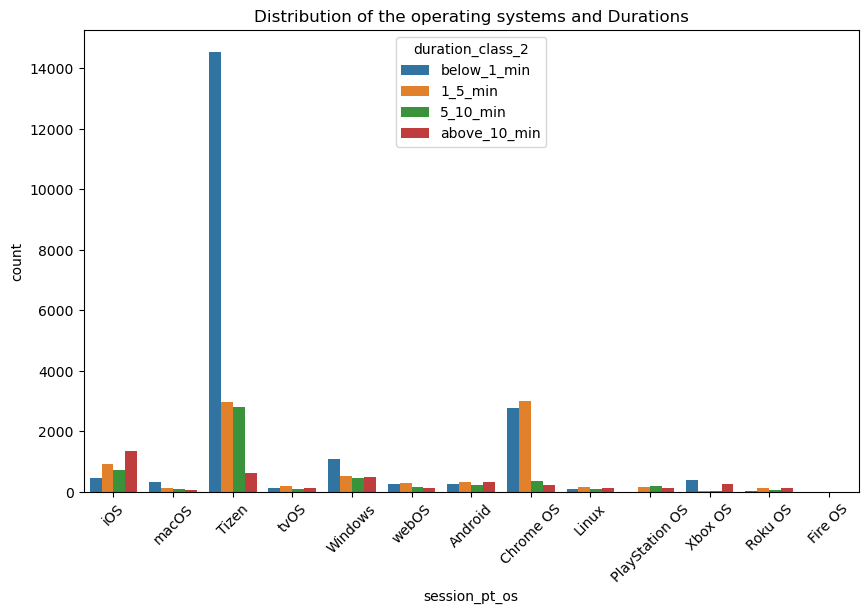

In [394]:
# Create a count plot for both categorical features in one plot
plt.figure(figsize=(10, 6))
sns.countplot(x='session_pt_os', hue='duration_class_2', data=df_)
# Rotate x-axis labels
plt.xticks(rotation=45)
plt.title('Distribution of the operating systems and Durations')

Text(0.5, 1.0, 'Distribution of Players and Durations')

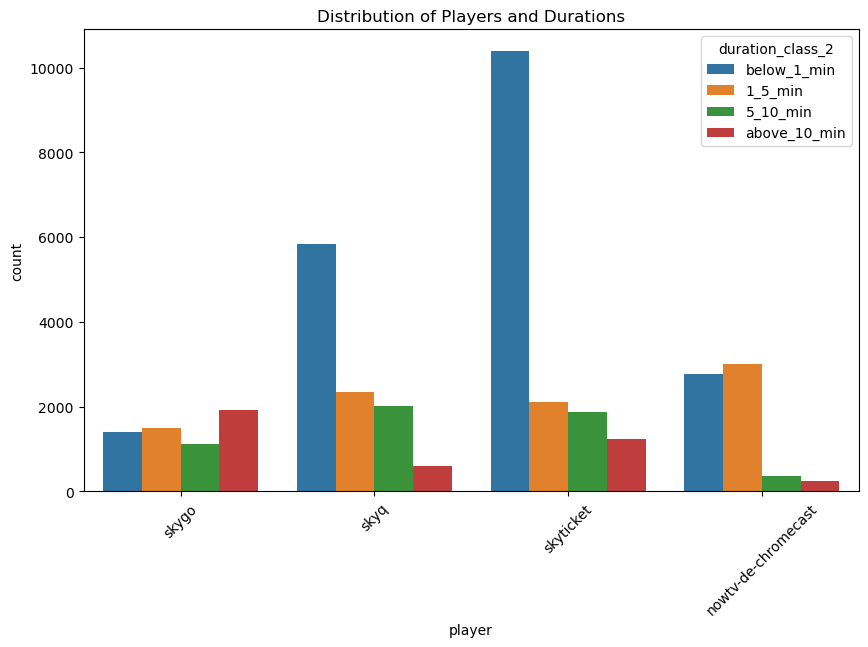

In [395]:
# Create a count plot for both categorical features in one plot
plt.figure(figsize=(10, 6))
sns.countplot(x='player', hue='duration_class_2', data=df_)
# Rotate x-axis labels
plt.xticks(rotation=45)
plt.title('Distribution of Players and Durations')

Text(0.5, 1.0, 'Relationship of Duration, Device and Operating systems')

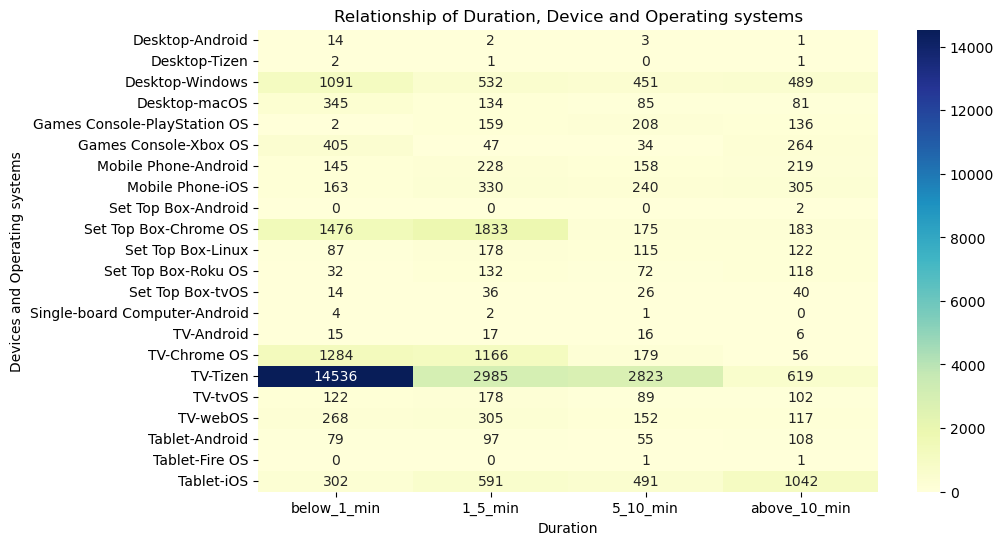

In [396]:
# Create a cross-tabulation or contingency table
cross_tab = pd.crosstab(index=[df_['session_hardware_type'], df_['session_pt_os']], columns=df_['duration_class_2'])

# Create a heatmap to visualize the relationships
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, cmap="YlGnBu", fmt="d")  # 'd' formats values as integers

# Set labels and title
plt.xlabel('Duration')
plt.ylabel('Devices and Operating systems')
plt.title('Relationship of Duration, Device and Operating systems')

### Players:

Text(0.5, 1.0, 'Relationship of Duration, Device and Players')

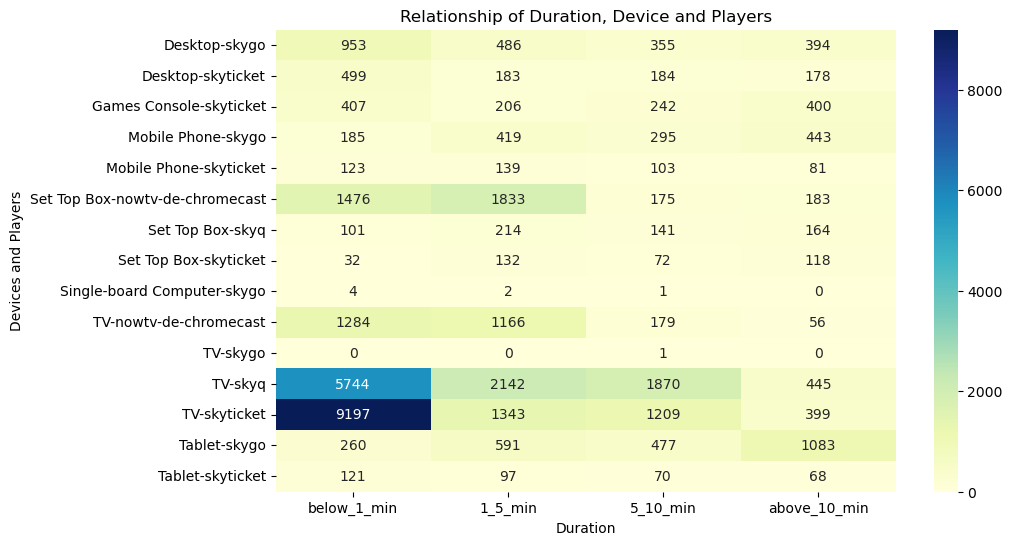

In [397]:
# Create a cross-tabulation or contingency table
cross_tab = pd.crosstab(index=[df_['session_hardware_type'], df_['player']], columns=df_['duration_class_2'])

# Create a heatmap to visualize the relationships
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, cmap="YlGnBu", fmt="d")  # 'd' formats values as integers

# Set labels and title
plt.xlabel('Duration')
plt.ylabel('Devices and Players')
plt.title('Relationship of Duration, Device and Players')


* startup time (milisecond) is the time between initiating the request and content playback

* Playing time (ms). Playing total duration

In [398]:
df_time.head()

,startTime,startupTimeMS,playingTimeMS,interrupts,startTime_hr_mt,endTime,endTime_hr_mt
0,2020-08-19 20:20:00+00:00,2258,3843094,0,20:20,2020-08-19 21:24:03.094000+00:00,21:24
1,2020-08-19 20:20:00+00:00,6406,583780,0,20:20,2020-08-19 20:29:43.780000+00:00,20:29
2,2020-08-19 20:20:00+00:00,1767,618627,1,20:20,2020-08-19 20:30:31.329000+00:00,20:30
3,2020-08-19 20:20:00+00:00,980,1125,1,20:20,2020-08-19 20:20:11.144000+00:00,20:20
4,2020-08-19 20:20:00+00:00,2532,916960,10,20:20,2020-08-19 20:38:01.641000+00:00,20:38


In [ ]:
df_time['playingTime_sec'].plot(kind='hist', edgecolor='black', bins=50)

In [ ]:
# Convert timedelta to seconds
df_time['duration_sec'] = df_time['duration_exact'].dt.total_seconds()

In [ ]:
df_time[:10]

#### Remark:
playingTime is total playing time

### check player coresponding os?manufacturers?...
to answer question 4: How can we split the data? Was it isolated to a specific device, operating system or player?

In [ ]:
# Create a cross-tabulation or contingency table
cross_tab = pd.crosstab(index=[df2['session_hardware_type'], df2['session_pt_os']], columns=df2['duration_class'])

# Create a heatmap to visualize the relationships
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, cmap="YlGnBu", fmt="d")  # 'd' formats values as integers

# Set labels and title
plt.xlabel('duration_class')
plt.ylabel('session_hardware_type + session_pt_os')
plt.title('Relationship between three categorical variables')

#### Interesting: 
* tablet ios has the most longer interruption.
* IOS has the most longer interruptions, Chrome OS has the most 1-5 minutes interruptions, while Tizen has mostly very short interruptions
* TV- Chrome OS


In [400]:
df_['cdn'].value_counts()

AKAMAI       20492
LIMELIGHT    18189
UNKNOWN         52
Name: cdn, dtype: int64

Text(0.5, 1.0, 'Distributions of cdn and Durations ')

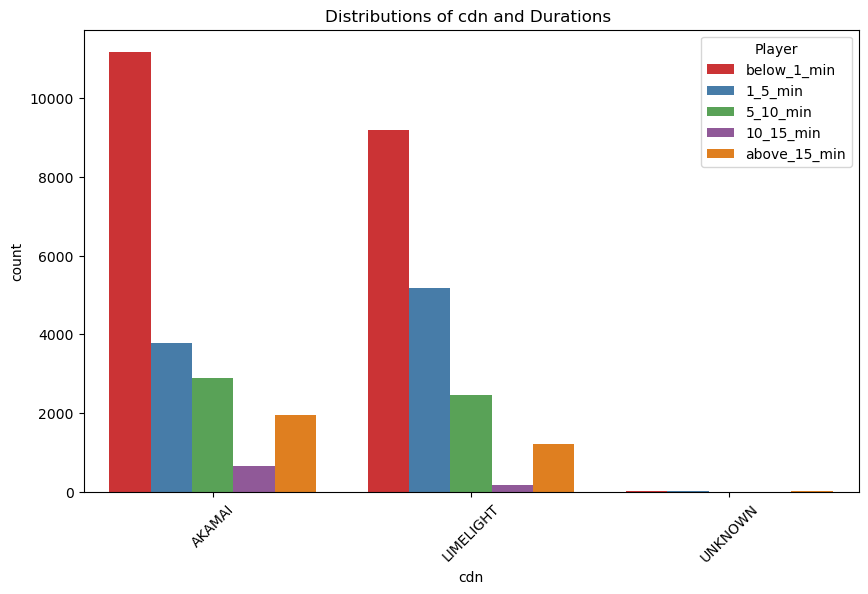

In [401]:
# Create a count plot for both categorical features in one plot
plt.figure(figsize=(10, 6))
sns.countplot(x='cdn', hue='duration_class', data=df_, palette="Set1")
# Rotate x-axis labels
plt.xticks(rotation=45)

# Adjust legend position
plt.legend(title='Player', loc='upper right', bbox_to_anchor=(1, 1))
plt.title('Distributions of cdn and Durations ')


In [ ]:
#and more
## deviceOS, session_hardware_type

The question is asking you to explore the dataset and determine if the reported customer complaints are associated with specific devices, operating systems, or players. In other words, the goal is to understand if the issues were concentrated or isolated to particular types of devices, operating systems, or players used by the customers during the time of the major Champions League football game.

Here are steps you can take to address this question:

Explore Unique Values:
Start by exploring unique values in columns related to devices, operating systems, and players. Look at columns such as 'deviceOS', 'session_device_manufacturer', 'session_device_brand', 'browser', 'session_browser_version', 'session_player_name', etc.

Filtering Data:
Use filters or conditions to separate the dataset based on specific features. For example, filter the dataset for complaints related to a particular 'deviceOS', 'browser', or 'session_player_name'.

Analysis:
Once you've separated the data, analyze each subset to see if there is a higher concentration of complaints within a specific category. Check if certain devices, operating systems, or players are associated with a larger number of complaints.

Visualizations:
Create visualizations, such as bar charts or pie charts, to illustrate the distribution of complaints across different devices, operating systems, or players. This can provide a clearer understanding of whether the issues are concentrated in specific categories.

Summary and Recommendations:
Summarize your findings and provide insights into whether the reported complaints are isolated to specific devices, operating systems, or players. If you observe patterns, you can make recommendations for further investigation or potential solutions.

For example, you might find that a specific version of a browser or a particular operating system has a higher number of complaints. This information can be valuable for troubleshooting and addressing customer concerns effectively.

In [205]:
df_.columns

Index(['asset', 'deviceOS', 'country', 'state', 'city', 'asn', 'isp',
       'startTime', 'startupTimeMS', 'playingTimeMS', 'interrupts', 'cdn',
       'vpfErrorList', 'endTime', 'session_device_manufacturer',
       'session_appversion', 'session_hardware_type', 'session_is_live',
       'session_channel_name', 'session_content_type', 'session_pt_os',
       'session_pt_os_ver', 'session_device_marketing_name',
       'session_player_name', 'startTime_hr_mt', 'endTime_hr_mt'],
      dtype='object')

### Clustering with k mean: not relevant

K-means clustering is a method used for grouping similar data points into clusters based on their features. It is generally applied to numerical data, and it might not be directly suitable for categorical data or cases where one wants to explore relationships between categorical variables. K-means relies on distances between points, and defining meaningful distances for categorical variables might be challenging.

### What then? 
For categorical variables, you might want to explore other techniques, such as:

Association Rule Mining: Techniques like Apriori or FP-growth can identify associations between different categorical variables. This is commonly used in market basket analysis.

Chi-square Test: This statistical test can be used to assess the independence between two categorical variables. It can help you understand if there's a significant relationship between two categorical variables.

Correspondence Analysis: This technique is used for visualizing relationships between categorical variables. It's an extension of the chi-square test.

Multinomial Logistic Regression: If your goal is to predict one categorical variable based on others, logistic regression can be adapted for multiple categories.

Visualization Techniques: Tools like heatmaps, mosaic plots, or parallel coordinate plots can help visualize relationships between multiple categorical variables.

The choice of method depends on your specific goals and the nature of your data. If you are dealing with numerical data derived from categorical variables (e.g., one-hot encoding), k-means might be applicable, but interpretability should be carefully considered. Always be mindful of the assumptions and limitations of the methods you choose.